In [1]:
if 'google.colab' in str(get_ipython()):
  # install packages needed for this task
  !pip install tensorflow==2.3.1
  !pip install tensorflow_quantum==0.4.0
  !pip install quple==0.6.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320.4 MB 28 kB/s 
     |████████████████████████████████| 20.1 MB 1.1 MB/s 
     |████████████████████████████████| 2.9 MB 40.8 MB/s 
     |████████████████████████████████| 459 kB 96.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.9 MB 11.4 MB/s 
     |████████████████████████████████| 1.6 MB 65.8 MB/s 
     |████████████████████████████████| 5.6 MB 55.4 MB/s 
     |████████████████████████████████| 1.3 MB 90.1 MB/s 
     |████████████████████████████████| 211 kB 72.6 MB/s 
     |████████████████████████████████| 211 kB 56.6 MB/s 
     |████████████████████████████████| 241 kB 64.4 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
  Attempting uninstall: googleapis-common-protos
    Found existing installation: googleapis-common-protos 1.56.2
    Uninstalling googleapis-common-protos-1.56.2:
      Successfully uninstalled googleapis-common-protos-1.56.2
  Attempting uninstall: sympy
    Found existing installation: sympy 1.7.1
    Uninstalling sympy-1.7.1:


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 220 kB/s 


In [1]:
import tensorflow as tf
import tensorflow_quantum as tfq

In [2]:
import os
import glob
import operator
import numpy as np
import pandas
import h5py

In [3]:
if 'google.colab' in str(get_ipython()):
  !wget https://gitlab.cern.ch/clcheng/gsoc2021_qml/-/raw/master/data/electron-photon.npz

--2022-06-29 03:37:30--  https://gitlab.cern.ch/clcheng/gsoc2021_qml/-/raw/master/data/electron-photon.npz
Resolving gitlab.cern.ch (gitlab.cern.ch)... 188.184.31.109, 188.184.28.144, 188.184.30.144, ...
Connecting to gitlab.cern.ch (gitlab.cern.ch)|188.184.31.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 821002 (802K) [application/zip]
Saving to: ‘electron-photon.npz.1’

electron-photon.npz 100%[===================>] 801.76K  --.-KB/s    in 0.1s    

2022-06-29 03:37:30 (6.95 MB/s) - ‘electron-photon.npz.1’ saved [821002/821002]



In [4]:
data = dict(np.load('electron-photon.npz'))
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']
print('Min(Max) of training sample: {}({:.4f})'.format(np.min(x_train), np.max(x_train)))
print('Min(Max) of test sample: {}({:.4f})'.format(np.min(x_test), np.max(x_test)))
print('Dimension of training sample: {}'.format(x_train.shape))
print('Dimension of test sample: {}'.format(x_test.shape))

Min(Max) of training sample: 0.0(1.4274)
Min(Max) of test sample: 0.0(1.3920)
Dimension of training sample: (100, 32, 32)
Dimension of test sample: (100, 32, 32)


In [61]:
data['y_train']

array([1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.],
      dtype=float32)

In [84]:
photon = []
plabel = []
for i in range(data['y_train'].shape[0]):
  if data['y_train'][i] == 1:
    photon.append(data['x_train'][i])
    plabel.append(data['y_train'][i])


In [94]:
photont = []
plabelt = []
for i in range(data['y_test'].shape[0]):
  if data['y_test'][i] == 1:
    photont.append(data['x_test'][i])
    plabelt.append(data['y_test'][i])

pxt = np.asarray(photont)
print('photon_test shape:',pxt.shape)
pyt = np.asarray(plabelt)
print('photon_test label shape:',pyt.shape)

photon_test shape: (46, 32, 32)
photon_test label shape: (46,)


In [100]:
px = np.asarray(photon)
print('photon train data shape:',px.shape)
py = np.asarray(plabel)
print('photon train label shape:',py.shape)

photon train data shape: (56, 32, 32)
photon train label shape: (56,)


In [5]:
import quple
import matplotlib.pyplot as plt
particle_label_map = {
    0: 'photon',
    1: 'electron'
}

In [19]:
from typing import Optional,Dict
def visualize_images(images:"numpy.ndarray", columns:int=8, subplots_options:Optional[Dict]=None,
                     labels:Optional["numpy.ndarray"]=None, label_map:Optional[Dict]=None):
    plt.clf()
    size = images.shape[0]
    rows = ( size // columns ) + 1
    fig = plt.figure(figsize=(20, rows*3))
    if (labels is not None) and (label_map is not None):
        assert labels.shape[0] == images.shape[0]
        titles = ["Image {}: {}".format(i, label_map[labels[i]]) for i in range(size)]
    else:
        titles = [None]*size
    for i in range(images.shape[0]):
        ax = fig.add_subplot(rows, columns, i+1)
        ax.set_title(titles[i])
        ax.imshow(images[i])
    if subplots_options is not None:
        plt.subplots_adjust(**subplots_options)
    return plt


In [96]:
def crop_image(img, dimension):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, dimension))
    end = tuple(map(operator.add, start, dimension))
    slices = tuple(map(slice, start, end))
    return img[slices]

crop_size = (8, 8)
x_train_cropped = np.array([crop_image(i, crop_size) for i in px])
x_test_cropped = np.array([crop_image(i, crop_size) for i in pxt])

In [103]:
x_train_cropped[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00155842, 0.00077262, 0.00153141,
        0.        , 0.        , 0.00032473],
       [0.        , 0.0007861 , 0.00300787, 0.00493266, 0.00474319,
        0.00283982, 0.00231653, 0.00121698],
       [0.        , 0.00058534, 0.02765649, 0.18430513, 0.3118749 ,
        0.18168978, 0.00801093, 0.0017369 ],
       [0.        , 0.00354715, 0.01978412, 0.08949634, 0.10792074,
        0.0705252 , 0.00864588, 0.00068282],
       [0.        , 0.002088  , 0.00371688, 0.00616156, 0.0058491 ,
        0.00495102, 0.        , 0.00054094],
       [0.        , 0.        , 0.00175862, 0.        , 0.        ,
        0.        , 0.        , 0.        ]], dtype=float32)

In [104]:
def visualize_image(img, labels):
    fig = plt.figure(figsize=(20,40))
    columns = 7
    rows = 15
    plt.subplots_adjust(hspace=0.3)
    for i in range(img.shape[0]):
        ax = fig.add_subplot(rows, columns, i+1)
        ax.set_title('Image {}: {}'.format(i+1, particle_label_map[labels[i]]))
        plt.imshow(img[i])
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

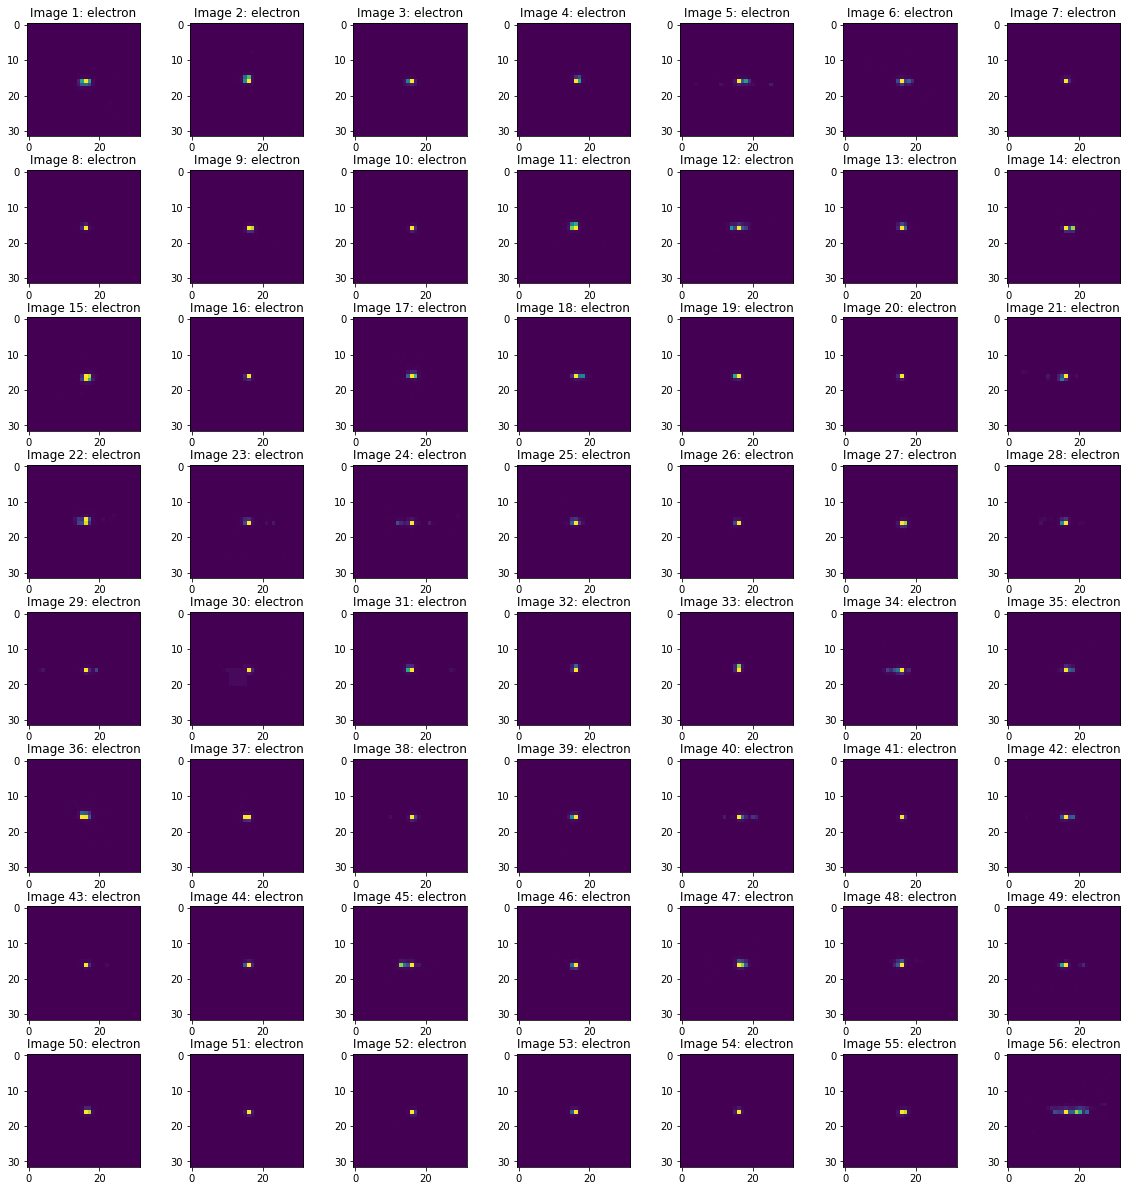

In [105]:
visualize_image(px,py)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

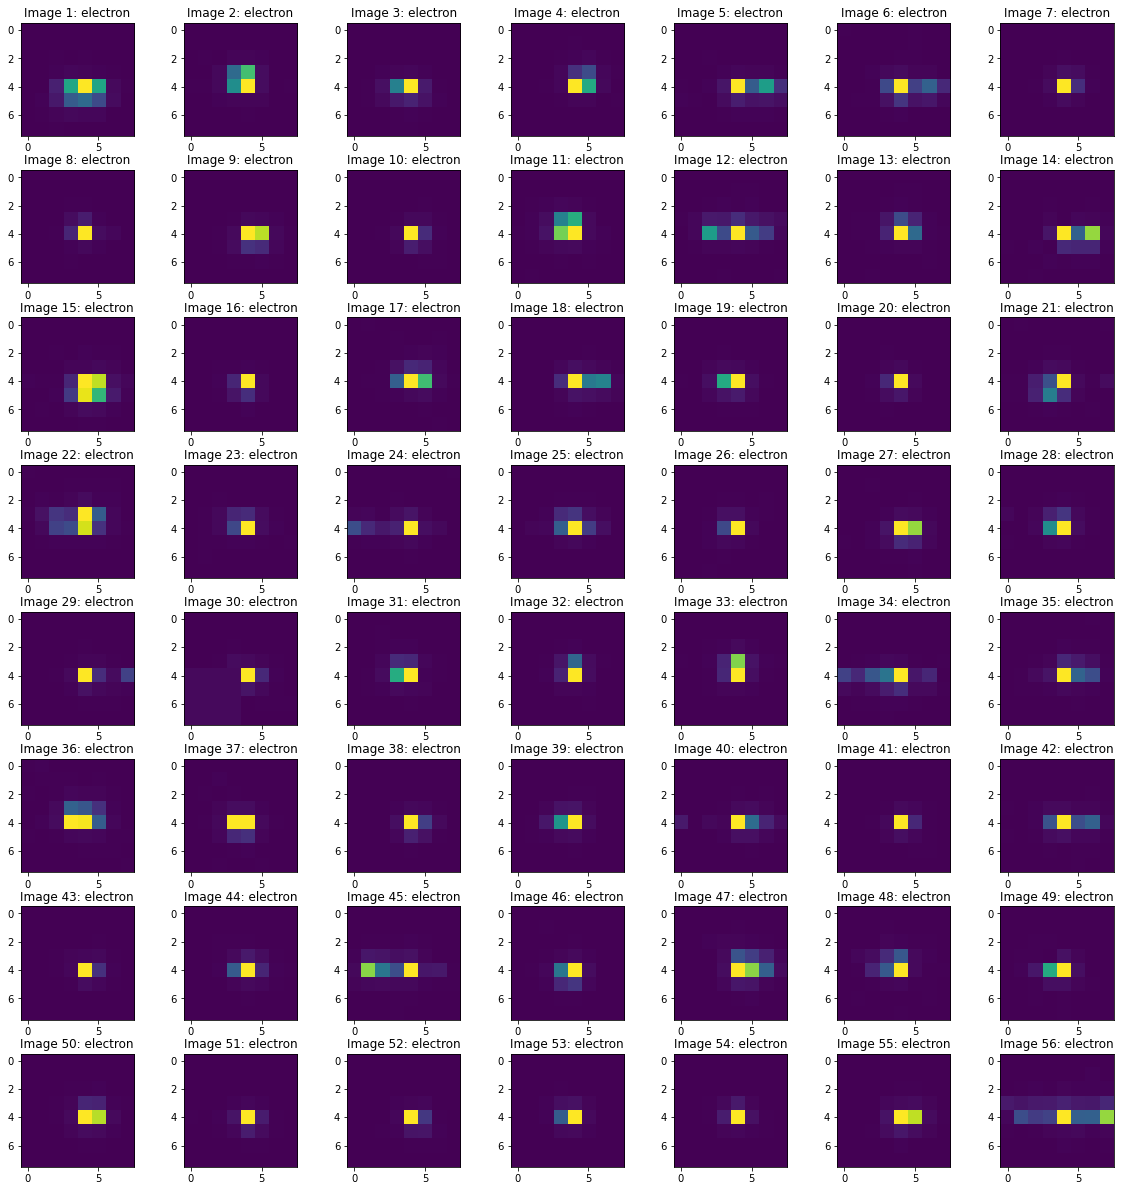

In [108]:
visualize_image(x_train_cropped,py)

In [109]:
def rescale_data(*data, val_range:tuple=(0, 1.)):
    min_value = np.min([np.min(d) for d in data])
    max_value = np.max([np.max(d) for d in data])
    range_min = val_range[0]
    range_max = val_range[1]
    rescaled_data = tuple([(((d-min_value)/(max_value-min_value))*(range_max-range_min))+range_min for d in data])
    if len(rescaled_data) == 1:
        return rescaled_data[0]
    return rescaled_data


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

<Figure size 432x288 with 0 Axes>

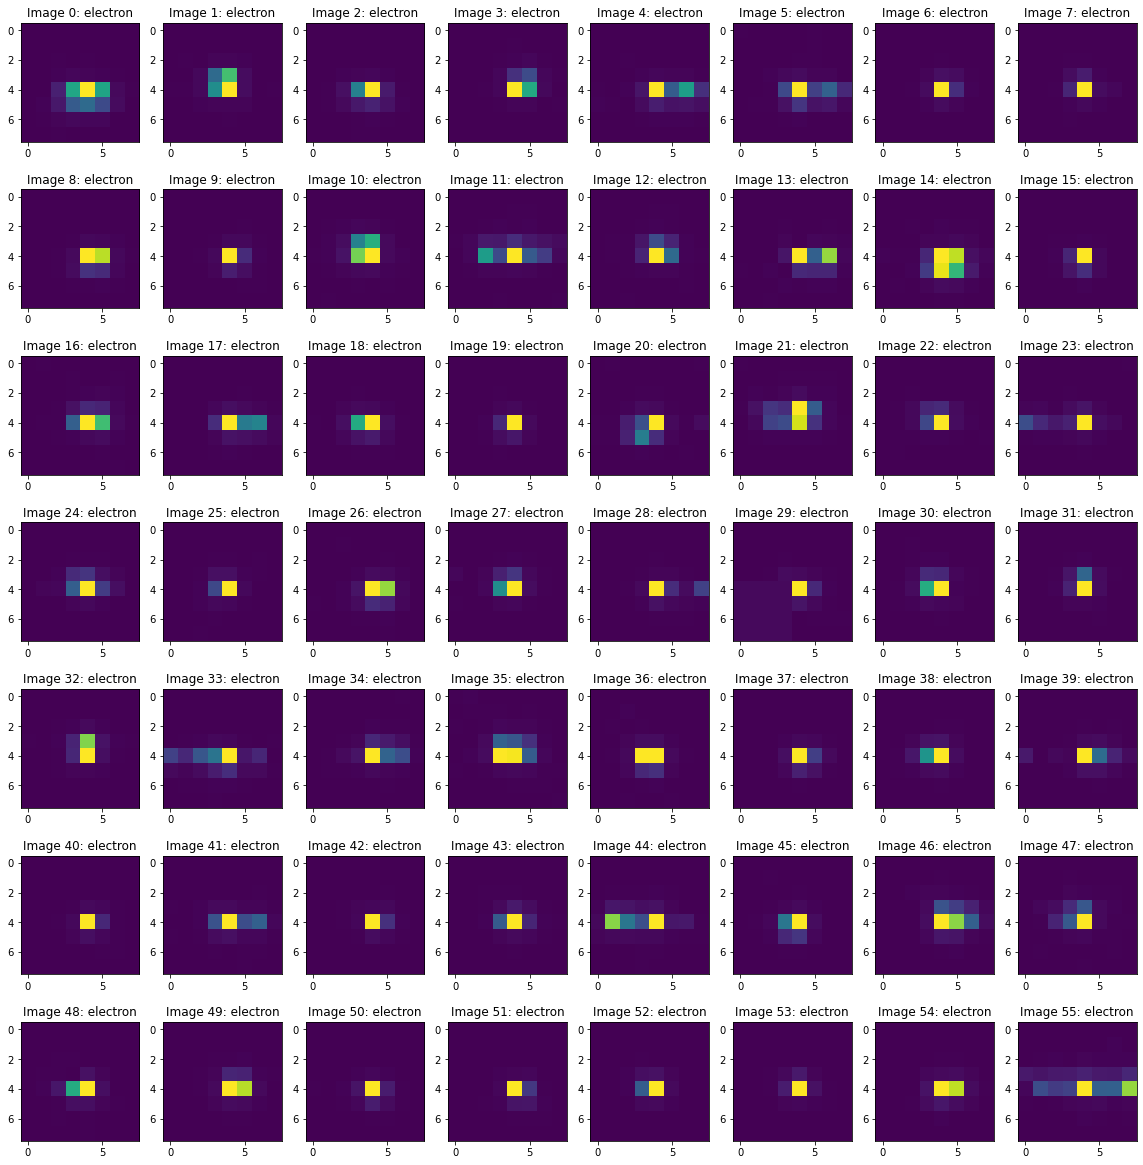

In [110]:
x_train_rescaled, x_test_rescaled = rescale_data(x_train_cropped, x_test_cropped, val_range=(-1, 1))
visualize_images(x_train_rescaled[:], labels=py[:], label_map=particle_label_map)

In [111]:
x_train_final = np.reshape(x_train_rescaled, (x_train_rescaled.shape[0], 8, 8))
x_test_final = np.reshape(x_test_rescaled, (x_test_rescaled.shape[0], 8, 8))

#QGAN

In [118]:
from quple import ParameterisedCircuit
from quple.data_encoding import FirstOrderPauliZEncoding

In [119]:
data_circuit_2x2 = FirstOrderPauliZEncoding(feature_dimension=4, copies=2, parameter_scale=1)
data_circuit_2x2

(0, 0): ───H───Rz(pi*<x_0/pi>)───H───Rz(pi*<x_0/pi>)───

(0, 1): ───H───Rz(pi*<x_1/pi>)───H───Rz(pi*<x_1/pi>)───

(0, 2): ───H───Rz(pi*<x_2/pi>)───H───Rz(pi*<x_2/pi>)───

(0, 3): ───H───Rz(pi*<x_3/pi>)───H───Rz(pi*<x_3/pi>)───

In [120]:
data_circuit_3x3 = FirstOrderPauliZEncoding(feature_dimension=9, copies=2, parameter_scale=1)
data_circuit_3x3

(0, 0): ───H───Rz(pi*<x_0/pi>)───H───Rz(pi*<x_0/pi>)───

(0, 1): ───H───Rz(pi*<x_1/pi>)───H───Rz(pi*<x_1/pi>)───

(0, 2): ───H───Rz(pi*<x_2/pi>)───H───Rz(pi*<x_2/pi>)───

(0, 3): ───H───Rz(pi*<x_3/pi>)───H───Rz(pi*<x_3/pi>)───

(0, 4): ───H───Rz(pi*<x_4/pi>)───H───Rz(pi*<x_4/pi>)───

(0, 5): ───H───Rz(pi*<x_5/pi>)───H───Rz(pi*<x_5/pi>)───

(0, 6): ───H───Rz(pi*<x_6/pi>)───H───Rz(pi*<x_6/pi>)───

(0, 7): ───H───Rz(pi*<x_7/pi>)───H───Rz(pi*<x_7/pi>)───

(0, 8): ───H───Rz(pi*<x_8/pi>)───H───Rz(pi*<x_8/pi>)───

In [121]:
kernel_circuit_2x2 = ParameterisedCircuit(n_qubit=4, copies=2, 
                                      rotation_blocks=["RY", "RZ"],
                                      entanglement_blocks=["CX"],
                                      entangle_strategy="alternate_linear")
kernel_circuit_2x2

(0, 0): ───Ry(θ_0)───Rz(θ_4)───@───Ry(θ_8)───Rz(θ_12)──────────────@───────
                               │                                   │
(0, 1): ───Ry(θ_1)───Rz(θ_5)───X───@─────────Ry(θ_9)────Rz(θ_13)───X───@───
                                   │                                   │
(0, 2): ───Ry(θ_2)───Rz(θ_6)───@───X─────────Ry(θ_10)───Rz(θ_14)───@───X───
                               │                                   │
(0, 3): ───Ry(θ_3)───Rz(θ_7)───X─────────────Ry(θ_11)───Rz(θ_15)───X───────

In [122]:
kernel_circuit_3x3 = ParameterisedCircuit(n_qubit=9, copies=2, 
                                      rotation_blocks=["RY", "RZ"],
                                      entanglement_blocks=["CX"],
                                      entangle_strategy="alternate_linear")
kernel_circuit_3x3

(0, 0): ───Ry(θ_0)───Rz(θ_9)────@───Ry(θ_18)───Rz(θ_27)──────────────@───────
                                │                                    │
(0, 1): ───Ry(θ_1)───Rz(θ_10)───X───@──────────Ry(θ_19)───Rz(θ_28)───X───@───
                                    │                                    │
(0, 2): ───Ry(θ_2)───Rz(θ_11)───@───X──────────Ry(θ_20)───Rz(θ_29)───@───X───
                                │                                    │
(0, 3): ───Ry(θ_3)───Rz(θ_12)───X───@──────────Ry(θ_21)───Rz(θ_30)───X───@───
                                    │                                    │
(0, 4): ───Ry(θ_4)───Rz(θ_13)───@───X──────────Ry(θ_22)───Rz(θ_31)───@───X───
                                │                                    │
(0, 5): ───Ry(θ_5)───Rz(θ_14)───X───@──────────Ry(θ_23)───Rz(θ_32)───X───@───
                                    │                                    │
(0, 6): ───Ry(θ_6)───Rz(θ_15)───@───X──────────Ry(θ_24)───Rz(θ_33)───@───X───
                                │                                    │
(0, 7): ───Ry(θ_7)───Rz(θ_16)───X───@──────────Ry(θ_25)───Rz(θ_34)───X───@───
                                    │                                    │
(0, 8): ───Ry(θ_8)───Rz(θ_17)───────X──────────Ry(θ_26)───Rz(θ_35)───────X───

In [123]:
pqc_data_circuit = FirstOrderPauliZEncoding(feature_dimension=4, copies=2, parameter_scale=1)
pqc_data_circuit

(0, 0): ───H───Rz(pi*<x_0/pi>)───H───Rz(pi*<x_0/pi>)───

(0, 1): ───H───Rz(pi*<x_1/pi>)───H───Rz(pi*<x_1/pi>)───

(0, 2): ───H───Rz(pi*<x_2/pi>)───H───Rz(pi*<x_2/pi>)───

(0, 3): ───H───Rz(pi*<x_3/pi>)───H───Rz(pi*<x_3/pi>)───

In [124]:
pqc_model_circuit = ParameterisedCircuit(n_qubit=4, copies=4, 
                                      rotation_blocks=["RY", "RZ"],
                                      entanglement_blocks=["ZZ","XX"])
pqc_model_circuit

┌──────────────────┐                                       ┌──────────────────┐                                                              ┌──────────────────┐                                       ┌──────────────────┐                                                              ┌──────────────────┐                                       ┌──────────────────┐                                                              ┌──────────────────┐                                       ┌──────────────────┐
(0, 0): ───Ry(θ_0)───Rz(θ_4)───ZZ─────────ZZ──────────ZZ────────────────────────────────XX──────────XX───────────XX────────────────────────────────Ry(θ_20)────Rz(θ_24)───ZZ──────────ZZ───────────ZZ────────────────────────────────XX──────────XX───────────XX────────────────────────────────Ry(θ_40)────Rz(θ_44)───ZZ──────────ZZ───────────ZZ────────────────────────────────XX──────────XX───────────XX────────────────────────────────Ry(θ_60)────Rz(θ_64)───ZZ──────────ZZ───────────ZZ────────────────────────────────XX──────────XX───────────XX────────────────────────────────────────────
                               │          │           │                                 │           │            │                                                        │           │            │                                 │           │            │                                                        │           │            │                                 │           │            │                                                        │           │            │                                 │           │            │
(0, 1): ───Ry(θ_1)───Rz(θ_5)───ZZ^(θ_8)───┼───────────┼────────ZZ───────────ZZ──────────XX^(θ_14)───┼────────────┼────────XX───────────XX──────────Ry(θ_21)────Rz(θ_25)───ZZ^(θ_28)───┼────────────┼────────ZZ───────────ZZ──────────XX^(θ_34)───┼────────────┼────────XX───────────XX──────────Ry(θ_41)────Rz(θ_45)───ZZ^(θ_48)───┼────────────┼────────ZZ───────────ZZ──────────XX^(θ_54)───┼────────────┼────────XX───────────XX──────────Ry(θ_61)────Rz(θ_65)───ZZ^(θ_68)───┼────────────┼────────ZZ───────────ZZ──────────XX^(θ_74)───┼────────────┼────────XX───────────XX──────────────────────
                                          │           │        │            │                       │            │        │            │                                              │            │        │            │                       │            │        │            │                                              │            │        │            │                       │            │        │            │                                              │            │        │            │                       │            │        │            │
(0, 2): ───Ry(θ_2)───Rz(θ_6)──────────────ZZ^(θ_9)────┼────────ZZ^(θ_11)────┼───────────ZZ──────────XX^(θ_15)────┼────────XX^(θ_17)────┼───────────XX──────────Ry(θ_22)───Rz(θ_26)────ZZ^(θ_29)────┼────────ZZ^(θ_31)────┼───────────ZZ──────────XX^(θ_35)────┼────────XX^(θ_37)────┼───────────XX──────────Ry(θ_42)───Rz(θ_46)────ZZ^(θ_49)────┼────────ZZ^(θ_51)────┼───────────ZZ──────────XX^(θ_55)────┼────────XX^(θ_57)────┼───────────XX──────────Ry(θ_62)───Rz(θ_66)────ZZ^(θ_69)────┼────────ZZ^(θ_71)────┼───────────ZZ──────────XX^(θ_75)────┼────────XX^(θ_77)────┼───────────XX──────────
                                                      │                     │           │                        │                     │           │                                               │                     │           │                        │                     │           │                                               │                     │           │                        │                     │           │                                               │                     │           │                        │                     │           │
(0, 3): ───Ry(θ_3)───Rz(θ_7)──────────────────────────ZZ^(θ_10)─────────────ZZ

In [178]:
kernel_circuit_2x2

(0, 0): ───Ry(θ_0)───Rz(θ_4)───@───Ry(θ_8)───Rz(θ_12)──────────────@───────
                               │                                   │
(0, 1): ───Ry(θ_1)───Rz(θ_5)───X───@─────────Ry(θ_9)────Rz(θ_13)───X───@───
                                   │                                   │
(0, 2): ───Ry(θ_2)───Rz(θ_6)───@───X─────────Ry(θ_10)───Rz(θ_14)───@───X───
                               │                                   │
(0, 3): ───Ry(θ_3)───Rz(θ_7)───X─────────────Ry(θ_11)───Rz(θ_15)───X───────

In [172]:
# as usual, we measure the last qubit
readout_3x3 = kernel_circuit_3x3.("Z", 3)
readout_2x2 = kernel_circuit_2x2.get_gate_operation('z', -1)
PQC_readout = pqc_model_circuit.get_gate_operation('z', -1)

AttributeError: ignored

In [ ]:
tfq.layer

In [184]:
def create_quantum_generator():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(64), dtype=tf.float32))
    model.add(tf.keras.layers.Reshape((8, 8, 1)))
    # model.add(tfq.layers.QConv2D(kernel_circuit_3x3, data_circuit_3x3, readout_3x3, kernel_size=(3, 3), 
    #                   filters=1, strides=(1, 1), padding="same", parameter_sharing=False, seed=2021,
    #                   ))
    # model.add(tfq.layers.QConv2D(kernel_circuit_2x2, data_circuit_2x2, readout_2x2, kernel_size=(2, 2), 
    #                   filters=1, strides=(1, 1), padding="same", parameter_sharing=True, seed=2022,
    #                   ))
    return model

def create_quantum_discriminator():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(8, 8, 1), dtype=tf.float32))
    # model.add(tfq.layers.QConv2D(kernel_circuit_3x3, data_circuit_3x3, readout_3x3, kernel_size=(3, 3), 
    #                     filters=3, strides=(1, 1), padding="same", parameter_sharing=True, seed=2023))    
    # model.add(tfq.layers.QConv2D(kernel_circuit_2x2, data_circuit_2x2, readout_2x2, kernel_size=(2, 2), 
    #                     filters=1, strides=(2, 2), padding="same", parameter_sharing=True, seed=2023))
    # model.add(tfq.layers.QConv2D(kernel_circuit_2x2, data_circuit_2x2, readout_2x2, kernel_size=(2, 2), 
    #                     filters=1, strides=(2, 2), padding="same", parameter_sharing=True, seed=2024))
    model.add(tf.keras.layers.Flatten())
    # model.add(tfq.layers.PQC(pqc_model_circuit, pqc_data_circuit, PQC_readout, seed=2025))
    return model

In [182]:
# as usual, we measure the last qubit
readout_3x3 = kernel_circuit_3x3.get_gate_operation("Z", -1)
readout_2x2 = kernel_circuit_2x2.get_gate_operation("Z", -1)
PQC_readout = pqc_model_circuit.get_gate_operation("Z", -1)

AttributeError: ignored

#### Defining AbstractModel and QGAN Model

In [179]:
from abc import ABC, abstractmethod
from inspect import signature, isclass
from typing import (Any, Callable, cast, Dict, FrozenSet, Iterable, Iterator,
                    List, Optional, overload, Sequence, Set, Tuple, Type,
                    TYPE_CHECKING, TypeVar, Union)
import sympy as sp
import numpy as np

import cirq
from cirq.ops.gate_features import SingleQubitGate, TwoQubitGate

from quple import QuantumCircuit, TemplateCircuitBlock
from quple.components.interaction_graphs import interaction_graph
from quple.utils.utils import merge_pqc, get_unique_symbols


class ParameterisedCircuit(QuantumCircuit, ABC):
    """Parameterised Quantum Circuit (PQC)
    
    The `ParameterisedCircuit` architecture consists of alternating rotation and entanglement 
    layers that are repeated for a certain number of times. In both layers, parameterized 
    circuit-blocks act on the circuit in a defined way. The rotation layer consists of single 
    qubit gate operations (rotation blocks) that are applied to every qubit in the circuit. 
    The entanglement layer consists of two (or multiple) qubit gate operations (entanglement blocks) 
    applied to the set of qubits defined by an interaction graph.
    
    Common single qubit gates in the rotation layer include the Hadamard gate,
    Pauli X, Pauli Y, Pauli Z gate and the corresponding rotation gates
    
    Common two qubit gates in the entangling layer include the CNOT (CX) gate,
    CZ gate, XX, YY, ZZ gate and the corresponding rotation gates.
    

    Examples:
        >> cq = ParameterisedCircuit(n_qubit=4)
        >> cq.build(rotation_blocks=['H','RZ'],
                    entanglement_blocks=['CNOT'],
                    entangle_strategy='linear',
                    copies=2)
        >> cq
        (0, 0): ───H───Rz(θ_0)───@───────H───Rz(θ_4)───@─────────────────
                                 │                     │
        (0, 1): ───H───Rz(θ_1)───X───@───H───Rz(θ_5)───X─────────@───────
                                     │                           │
        (0, 2): ───H───Rz(θ_2)───────X───@───H─────────Rz(θ_6)───X───@───
                                         │                           │
        (0, 3): ───H───Rz(θ_3)───────────X───H─────────Rz(θ_7)───────X───
    Args:
        n_qubit: int
           Number of qubits in the circuit
        copies: int
           Number of times the layers are repeated.
        rotation_blocks: A list of single qubit gate operations to be applied in the rotation layer.
        entanglement_blocks: A list of multi qubit gate operations to be applied in the entanglement layer.
        entangle_strategy: default='full'
            Determines how the qubits are connected in an entanglement block.
            If str, it specifies the name of the strategy.
            If callable, it specifies the function to map to an interaction graph.
            If list of str, it specifies the names of a list of strategies. The 
            strategy to use is decided by the current block index. For example, if
            the circuit is building the n-th entanglement block in the entanglement layer,
            then the n-th strategy in the list will be used.
            If list of callable, it specifies the list of functions to map to an interaction
            graph. The function to use is decided by the current block index.
        parameter_symbol: str
           Symbol prefix for circuit parameters.
        final_rotation_layer: boolean, default=False
           Whether to add an extra final rotation layer to the circuit.
        flatten_circuit: boolean, default=False
           Whether to flatten circuit parameters when the circuit is modified.
        name: str
           Name of the circuit.    
    """
    def __init__(self, n_qubit:int, copies:int=1,
                rotation_blocks:Optional[Union[str, cirq.Gate, Callable, 'TemplateCircuitBlock',
                                               List[str],List[cirq.Gate],List[Callable],
                                               List['TemplateCircuitBlock']]] =None,
                entanglement_blocks:Optional[Union[str, cirq.Gate, Callable, 'TemplateCircuitBlock',
                                               List[str],List[cirq.Gate],List[Callable],
                                               List['TemplateCircuitBlock']]] =None,
                entangle_strategy:Optional[Union[str,List[str], Callable[[int,int],List[Tuple[int]]],
                                                 List[Callable[[int,int],List[Tuple[int]]]]]]=None,
                parameter_symbol:str='θ',
                final_rotation_layer:bool=False,
                flatten_circuit:bool=False,
                reuse_param_per_depth:bool=False,
                reuse_param_per_layer:bool=False,
                reuse_param_per_template:bool=False,
                parameter_index:Optional[int]=None,
                parameter_scale=1,
                name:str='ParameterisedCircuit',
                *args, **kwargs):
        """ Creates a parameterised circuit following the scheme of 
            alternating rotation and entanglement layers 
           
            Args:
                n_qubit: int
                   Number of qubits in the circuit
                copies: int
                   Number of times the layers are repeated.
                rotation_blocks: A list of single qubit gate operations to be applied in the rotation layer.
                entanglement_blocks: A list of multi qubit gate operations to be applied in the entanglement layer.
                entangle_strategy: default=None
                    Determines how the qubits are connected in an entanglement block.
                    If None, it defaults to using full entanglement.
                    If str, it specifies the name of the strategy.
                    If callable, it specifies the function to map to an interaction graph.
                    If list of str, it specifies the names of a list of strategies. The 
                    strategy to use is decided by the current block index. For example, if
                    the circuit is building the n-th entanglement block in the entanglement layer,
                    then the n-th strategy in the list will be used.
                    If list of callable, it specifies the list of functions to map to an interaction
                    graph. The function to use is decided by the current block index.
                parameter_symbol: str
                   Symbol prefix for circuit parameters.
                final_rotation_layer: boolean, default=False
                   Whether to add an extra final rotation layer to the circuit.
                flatten_circuit: boolean, default=False
                   Whether to flatten circuit parameters when the circuit is modified.
                reuse_param_per_depth: boolean, default=False
                   Whether to reuse parameter symbols at every new depth (symbol starting index reset to 0)
                reuse_param_per_layer: boolean, default=False
                   Whether to reuse parameter symbols at every new layer (symbol starting index reset to 0)
                reuse_param_per_template: boolean, default=False
                   Whether to reuse parameter symbols at every new template block (symbol starting index reset to 0)
                parameter_index: int, default=None
                   Starting index of the first parameter
                name: str
                   Name of the circuit. 
        """
        super().__init__(n_qubit, name=name, *args, **kwargs)
        self._parameter_symbol = parameter_symbol
        self._parameters = np.array([], dtype=object)
        self._readout_qubit = None
        self._flatten_circuit = flatten_circuit
        self._entangle_strategy = entangle_strategy if entangle_strategy else 'full'
        self._parameter_index = parameter_index
        self._reuse_param_per_depth    = reuse_param_per_depth
        self._reuse_param_per_layer    = reuse_param_per_layer
        self._reuse_param_per_template = reuse_param_per_template
        self._parameter_scale = parameter_scale        
        self.build(rotation_blocks, entanglement_blocks, entangle_strategy, copies,
                  final_rotation_layer)
    
    @property
    def entangle_strategy(self):
        return self._entangle_strategy
        
    @property
    def readout_qubit(self):
        """Returns the readout qubit of the circuit
        """
        return self._readout_qubit
    
    @property
    def parameter_index(self):
        """Returns the starting index for the next new parameter symbol
        """
        return self._parameter_index
    
    @property
    def num_param(self):
        """Number of parameters in the circuit created through the 
           add rotation layer and add entanglement layer methods
        """
        return len(self._parameters)
    
    @property
    def parameter_scale(self):
        return self._parameter_scale
    
    def new_param(self, size:int=1, as_array=False) -> sp.Symbol:
        """Returns a new parameter(s) with updated array index(indices)
        
        Args:
            size: int
                Number of new parameters to return 
        
        Returns:
            New parameter(s) with updated array index(indices)
        """
        if size < 1:
            raise ValueError('Number of new parameters created must be greater than zero')
            
        if self.parameter_index is None:
            start = self.num_param
        else:
            start = self.parameter_index
            self._parameter_index += size
            
        params = np.array([sp.Symbol('%s_%s' % (self.parameter_symbol, i)) \
                          for i in range(start, start+size)])
        all_params = np.append(self._parameters, params)
        self._parameters = np.array(get_unique_symbols(all_params))
        
        if (len(params) == 1) and (not as_array):
            return params[0]*self.parameter_scale

        return params*self.parameter_scale
    
    def reset_index(self, index:int=0):
        self._parameter_index = index        
        
    @property
    def parameters(self):
        """Returns an array of parameters in the circuit
        """
        return self._parameters
    
    @property
    def flatten_circuit(self):
        """Whether to flatten the circuit upon construction or modification
        """
        return self._flatten_circuit
    
    @property
    def parameter_symbol(self) -> str:
        """The symbol prefix for the arrays of parameters in the circuit
        """
        return self._parameter_symbol

    def _parse_rotation_blocks(self, rotation_blocks):
        result = ParameterisedCircuit._parse_blocks(rotation_blocks)
        ParameterisedCircuit._validate_blocks(result, SingleQubitGate)
        return result
    
    def _parse_entanglement_blocks(self, entanglement_blocks):
        result = ParameterisedCircuit._parse_blocks(entanglement_blocks)
        ParameterisedCircuit._validate_blocks(result, TwoQubitGate)
        return result
        
    @staticmethod
    def _parse_blocks(blocks) -> List:
        if not blocks:
            return []
        blocks = [blocks] if not isinstance(blocks, list) else blocks
        blocks = [QuantumCircuit._parse_gate_operation(block) \
                  if not isinstance(block, TemplateCircuitBlock) \
                  else block for block in blocks]
        return blocks
    
    @staticmethod
    def _validate_blocks(blocks, gate_feature=None) -> None:
        for block in blocks:
            if isinstance(block, TemplateCircuitBlock):
                continue
            elif isinstance(block, cirq.Gate):
                if gate_feature and \
                    not isinstance(block, gate_feature):
                    raise ValueError('Gate operation {} should be a subclass of '
                                     '{}'.format(type(block), gate_feature))
            elif isclass(block) and issubclass(block, cirq.Gate):
                parameters = ParameterisedCircuit._get_gate_parameters(block)
                n_param = len(parameters)
                dummpy = sp.symarray('x',n_param)
                kwargs = {parameters[i]:dummpy[i] for i in range(n_param)}
                ParameterisedCircuit._validate_blocks([block(**kwargs)], gate_feature)
            elif callable(block):
                n_param = ParameterisedCircuit._get_parameter_count(block)
                if not n_param:
                    raise ValueError('not a valid gate operation or'
                                     'circuit block: {}'.format(block))
                dummy_params = tuple(sp.symarray('x',n_param))
                ParameterisedCircuit._validate_blocks([block(*dummy_params)], gate_feature)
    @staticmethod
    def _get_gate_parameters(gate):
        parameters = []
        parameters_dict = dict(signature(gate).parameters)
        for param_name in parameters_dict:
            annotation = parameters_dict[param_name].annotation
            if (annotation == sp.Basic) or (hasattr(annotation, '__args__') and sp.Basic in annotation.__args__):
                parameters.append(param_name)
        return parameters
      
    @staticmethod
    def _get_parameter_count(gate_expr) -> int:
        '''Returns the number of parameters required for a gate operation expression
        a gate operation expression can be a cirq.Gate instance, a string that can be mapped
        to a cirq.Gate instance, a function that maps to cirq.Gate or a TemplateCircuitBlock instance
        '''
        if isinstance(gate_expr, cirq.Gate):
            return 0
        elif isclass(gate_expr) and issubclass(gate_expr, cirq.Gate):
            return len(ParameterisedCircuit._get_gate_parameters(gate_expr))
        elif isinstance(gate_expr, TemplateCircuitBlock):
            return gate_expr.num_params
        elif callable(gate_expr):
            return len(signature(gate_expr).parameters)
        else:
            raise ValueError('invalid gate expression {} of type {}'.format(gate_expr, type(gate_expr)))

    def get_wavefunction(self, vals:np.ndarray):
        """Returns the simulated wavefunction of the circuit
        """
        simulator = cirq.Simulator()
        param_resolver = self.get_parameter_resolver(vals)
        return simulator.simulate(self, param_resolver=param_resolver).final_state   
    
    
    def add_readout(self, gate:Union[str, cirq.Gate]='XX',
                    readout_qubit:Optional['cirq.GridQubit']=None):
        """Adds a readout qubit to the parameterised circuit
        
        The readout qubit will be entangled to all input qubits via certain two qubit gate operations.
        
        Args:
            gate: The gate operation for entangling the readout qubit to input qubits. 
            readout_qubit: The qubit as readout. Default as (-1, -1).
        """
        parsed_gate = QuantumCircuit._parse_gate_operation(gate)
        readout_qubit = cirq.GridQubit(-1, -1) if readout_qubit is None else readout_qubit
        for qubit in self.qubits:
            final_gate = self.parameterise_gate(parsed_gate)
            self.apply_gate_operation(final_gate, (readout_qubit, qubit))
        if self.flatten_circuit:
            self.flatten()            
        self._readout_qubit = readout_qubit
    
    def readout_measurement(self):
        """Returns the readout gate operation for the readout qubit
        """
        if self.readout_qubit is None:
            raise ValueError('no readout qubit defined in the circuit')
        return cirq.Z(self.readout_qubit)
        
    def merge(self, other):
        """Merges the current circuit with another parameterised circuit
        
        This will update the parameters in the current circuit. If the current 
        circuit is flattened, the merged circuit will be flattened as well.
        
        Args:
            other: the parameterised circuit to be merged with the current circuit
        """
        self._moments = merge_pqc([self, other])._moments
        self._parameters = sp.symarray(self.parameter_symbol, len(self.symbols))
        if self.flatten_circuit:
            self.flatten()

    def get_gate_operation(self, operation:[str, cirq.Gate], qubit_expr, params:Optional[Dict]=None):
        """Obtain a list of gate operations on designated qubits
        
        Args:
            operation: the gate operation to apply
            qubit_expr: the qubits on which the gate operation is applied
            params: a dict containing the parameters for the gate operation
        
        Returns:
            List of gate operations on designated qubits
        """
        operation = QuantumCircuit._parse_gate_operation(operation)
        if params is not None:
            operation = operation(**params)
        qubit_sequence = self.qr.get(qubit_expr)
        if not isinstance(qubit_sequence, (list, np.ndarray)):
            qubit_sequence = [qubit_sequence]
        
        gate_ops = None
        if all(isinstance(qubits, GridQubit) for qubits in qubit_sequence):
            gate_ops = [operation(qubit) for qubit in qubit_sequence]
        elif all(isinstance(qubits, tuple) for qubits in qubit_sequence):
            gate_ops = [operation(*qubits) for qubits in qubit_sequence]
        else:
            raise ValueError('Inconsistent qubit representation: {}'.format(qubit_sequence))

        return gate_ops

                        
    def get_interaction_graphs(self, block_index:int, num_block_qubits:int,
                               entangle_strategy:Optional[Union[str,List[str], Callable[[int,int],List[Tuple[int]]],
                                                 List[Callable[[int,int],List[Tuple[int]]]]]]=None,
                               *args, **kwargs):
        """Returns the interaction graphs for an entanglement block
        
        Args:
            block_index: int
                Index of the current entanglement block in the entanglement layer.
            num_block_qubits: int
                Number of qubits in the entanglement block. That is the number of 
                qubits involved in a gate operation of the entanglement block.
            entangle_strategy: Determines how the qubits are entangled.
                If str, it specifies the name of the strategy.
                If callable, it specifies the function to map to an interaction graph.
                If list of str, it specifies the names of a list of strategies. The 
                strategy to use is decided by the current block index. For example, if
                the circuit is building the n-th entanglement block in the entanglement layer,
                then the n-th strategy in the list will be used.
                If list of callable, it specifies the list of functions to map to an interaction
                graph. The function to use is decided by the current block index.
        Returns:
            A list of tuples specifying the interaction graphs for an entanglement block
        """
        strategy = entangle_strategy if entangle_strategy is not None else self.entangle_strategy
        if isinstance(strategy, str):
            return interaction_graph[strategy](self.n_qubit, num_block_qubits)
        elif callable(strategy):
            return strategy(self.n_qubit, num_block_qubits)
        elif isinstance(strategy, list):
            if all(isinstance(strat, str) for strat in strategy):
                return interaction_graph[strategy[block_index]](self.n_qubit, num_block_qubits)
            elif all(callable(strat) for strat in strategy):
                return strategy[block_index](self.n_qubit, num_block_qubits)
            elif all(isinstance(strat, tuple) for strat in strategy):
                return strategy
        else:
            raise ValueError('invalid entangle strategy: {}'.format(strategy))
        
    def parameterise_gate(self, gate:Union[cirq.Gate, Callable]):
        """Parameterises a gate operation
        
        The gate operation will be parameterised by new symbols from the parameterised circuit.
        This will update the parameter arrays in the circuit.
        
        Args:
            gate: The gate operation to be parameterised
        Returns:
            A parameterised gate operation
        """        
        if isinstance(gate, cirq.Gate):
            if isinstance(gate, (cirq.XXPowGate, cirq.YYPowGate, cirq.ZZPowGate)):
                param = self.new_param()
                return gate**param
            return gate
        elif isclass(gate) and issubclass(gate, cirq.Gate):
            parameters = ParameterisedCircuit._get_gate_parameters(gate)
            n_param = len(parameters)
            params = self.new_param(size=n_param, as_array=True)
            kwargs = {parameters[i]:params[i] for i in range(n_param)}
            return gate(**kwargs)    
        else:
            n_param = ParameterisedCircuit._get_parameter_count(gate)
            params = self.new_param(size=n_param)
            params = tuple(params) if isinstance(params, np.ndarray) else (params,)          
            return gate(*params)
        
    def add_rotation_layer(self, rotation_blocks:Optional[Union[str, cirq.Gate, Callable,
                                               List[str],List[cirq.Gate],List[Callable],
                                               List['TemplateCircuitBlock']]] =None):
        """Adds a rotation layer to the parameterised circuit
        
        Args:
            rotation_blocks: A list of single qubit gate operations to be applied in the rotation layer.
        """
        rotation_blocks = self._parse_rotation_blocks(rotation_blocks)
        for i, block in enumerate(rotation_blocks):
            if self._reuse_param_per_layer:
                self.reset_index()
            if isinstance(block, TemplateCircuitBlock):
                interaction_graphs = self.get_interaction_graphs(i, block.num_block_qubits)
                for qubits in interaction_graphs:
                    if self._reuse_param_per_template:
                        self.reset_index()
                    block.build(self, qubits)
            else:
                for qubit in range(self.n_qubit):
                    gate = self.parameterise_gate(block)
                    self.apply_gate_operation(gate, qubit)
                
    def add_entanglement_layer(self, entanglement_blocks:Optional[Union[str, cirq.Gate, Callable, 'TemplateCircuitBlock',
                                               List[str],List[cirq.Gate],List[Callable],
                                               List['TemplateCircuitBlock']]] =None,
                entangle_strategy:Optional[Union[str,List[str], Callable[[int,int],List[Tuple[int]]],
                                                 List[Callable[[int,int],List[Tuple[int]]]]]]=None):
        """Adds an entanglement layer to the parameterised circuit
        
        Args:
            entanglement_blocks: A list of multi qubit gate operations to be applied in the entanglement layer.
            entangle_strategy: Determines how the qubits are entangled in an entanglement block.
                If str, it specifies the name of the strategy.
                If callable, it specifies the function to map to an interaction graph.
                If list of str, it specifies the names of a list of strategies. The 
                strategy to use is decided by the current block index. For example, if
                the circuit is building the n-th entanglement block in the entanglement layer,
                then the n-th strategy in the list will be used.
                If list of callable, it specifies the list of functions to map to an interaction
                graph. The function to use is decided by the current block index.
        """       
        entangle_strategy = entangle_strategy or 'full' 
        entanglement_blocks = self._parse_entanglement_blocks(entanglement_blocks)
        for i, block in enumerate(entanglement_blocks):
            if self._reuse_param_per_layer:
                self.reset_index()            
            if isinstance(block, TemplateCircuitBlock):
                interaction_graphs = self.get_interaction_graphs(i, block.num_block_qubits,
                                                                entangle_strategy)
                for qubits in interaction_graphs:
                    if self._reuse_param_per_template:
                        self.reset_index()                    
                    block.build(self, qubits)
            else:
                interaction_graphs = self.get_interaction_graphs(i, 2, entangle_strategy)
                for qubits in interaction_graphs:
                    gate = self.parameterise_gate(block)
                    self.apply_gate_operation(gate, qubits)
                    
                    
    def build(self, rotation_blocks:Optional[Union[str, cirq.Gate, Callable, 'TemplateCircuitBlock',
                                               List[str],List[cirq.Gate],List[Callable],
                                               List['TemplateCircuitBlock']]] =None,
                entanglement_blocks:Optional[Union[str, cirq.Gate, Callable, 'TemplateCircuitBlock',
                                               List[str],List[cirq.Gate],List[Callable],
                                               List['TemplateCircuitBlock']]] =None,
                entangle_strategy:Optional[Union[str,List[str], Callable[[int,int],List[Tuple[int]]],
                                                 List[Callable[[int,int],List[Tuple[int]]]]]]=None,
                copies:int=1, final_rotation_layer:bool=False):
        """Builds a parameterised circuit following the scheme of 
           alternating rotation and entanglement layers 
           
           Args:
               rotation_blocks: A list of single qubit gate operations to be applied in the rotation layer.
               entanglement_blocks: A list of multi qubit gate operations to be applied in the entanglement layer.
               entangle_strategy: Determines how the qubits are entangled in an entanglement block.
                   If str, it specifies the name of the strategy.
                   If callable, it specifies the function to map to an interaction graph.
                   If list of str, it specifies the names of a list of strategies. The 
                   strategy to use is decided by the current block index. For example, if
                   the circuit is building the n-th entanglement block in the entanglement layer,
                   then the n-th strategy in the list will be used.
                   If list of callable, it specifies the list of functions to map to an interaction
                   graph. The function to use is decided by the current block index.
               copies: int
                   Number of times the layers are repeated.
                   
            Examples:
                >> cq = ParameterisedCircuit(n_qubit=4)
                >> cq.build(rotation_blocks=['H','RZ'],
                            entanglement_blocks=['CNOT'],
                            entangle_strategy='linear',
                            copies=2)
                >> cq
                (0, 0): ───H───Rz(θ_0)───@───────H───Rz(θ_4)───@─────────────────
                                         │                     │
                (0, 1): ───H───Rz(θ_1)───X───@───H───Rz(θ_5)───X─────────@───────
                                             │                           │
                (0, 2): ───H───Rz(θ_2)───────X───@───H─────────Rz(θ_6)───X───@───
                                                 │                           │
                (0, 3): ───H───Rz(θ_3)───────────X───H─────────Rz(θ_7)───────X───
        """
        self.clear()
        for _ in range(copies):
            if self._reuse_param_per_depth:
                self.reset_index()
            self.add_rotation_layer(rotation_blocks)
            self.add_entanglement_layer(entanglement_blocks, entangle_strategy)
            
        if final_rotation_layer:
            self.add_rotation_layer(rotation_blocks)
            
        if self.flatten_circuit:
            self.flatten()                    
    
    def clear(self) -> None:
        """Clears all gate operations in the circuit
        """
        super().clear()
        self._parameters = np.array([], dtype=object)
        
        
    def run_simulator(self, repetitions:int=1):
        pass
        #simulator = cirq.Simulator()
        #simulator.run(resolved_circuit, repetitions=repetitions)
        ## to get wave function:
        #simulator.simulate(resolved_circuit)
        #cirq.measure_state_vector   
        #output_state_vector = simulator.simulate(self, resolver).final_state
        #z0 = cirq.X(q0)
        #qubit_map = {q0: 0, q1: 1}
        #z0.expectation_from_wavefunction(output_state_vector, qubit_map).real


In [135]:
from typing import Optional, Union, Dict
from collections.abc import Iterable
from abc import ABC, abstractmethod

import tensorflow as tf
import numpy as np

class AbstractModel(ABC):
    """Abstract class for building quantum models"""
    def __init__(self, name:Optional[str]=None,
                 random_state:Optional[int]=None, 
                 checkpoint_dir:Optional[str]=None,
                 checkpoint_interval:int=10,
                 checkpoint_max_to_keep:Optional[int]=None):
        """Instantiate the quantum model
        
            Arguments:
                name: (Optional) string
                    Name given to the model.
                random_state: (Optional) int
                    The random state used at the beginning of a training
                    for reproducible result.
                checkpoint_dir: Optional[string]
                    The path to a directory in which to write checkpoints. If None,
                    no checkpoint will be saved.
                checkpoint_interval: int, default=10
                    Number of epochs between each checkpoint.
                checkpoint_max_to_keep: (Optional) int
                    Number of checkpoints to keep. If None, all checkpoints are kept.
        """
        # for restoring epoch at checkpoint
        self.start_epoch = 0
        
        self.name = name
        self.random_state = random_state
        
        self.set_random_state(self.random_state)
        self._setup_checkpoint(checkpoint_dir, checkpoint_interval,
                               checkpoint_max_to_keep)
        
        self._validate_init()
        
    def _validate_init(self):
        pass
    
    @abstractmethod
    def _create_checkpoint(self, *args, **kwargs):
        pass
    
    def _setup_checkpoint(self, directory:Optional[str]=None, interval:int=10,
                          max_to_keep:Optional[int]=None, *args, **kwargs):
        """Setup training checkpoints.
            
            Note that checkpoints are created only when training starts.
            
            Arguments:
                directory: string
                    The path to a directory in which to write checkpoints.
                interval: int, default=10
                    Number of epochs between each checkpoint.
                max_to_keep: (Optional) int
                    Number of checkpoints to keep. If None, all checkpoints are kept.
        """
        self.checkpoint_dir = directory
        self.checkpoint_interval = interval
        self.checkpoint_max_to_keep = max_to_keep
        
        if self.checkpoint_dir is not None:
            self.checkpoint = self._create_checkpoint(*args, **kwargs)
            self.checkpoint_manager = tf.train.CheckpointManager(self.checkpoint, 
                                                                 self.checkpoint_dir,
                                                                 self.checkpoint_max_to_keep)
        else:
            self.checkpoint = None
            self.checkpoint_manager = None
    
    @staticmethod
    def set_random_state(random_state:Optional[int]=None):
        """Set the global random states for the tensorflow and the numpy libraries
            
            Arguments:
                random_state: (Optional) int
                    Random state to set.
        """
        tf.random.set_seed(random_state)
        np.random.seed(random_state)
        
    @staticmethod
    def prepare_dataset(*data, batch_size:int, seed=None, drop_remainder=True, buffer_size=10000):
        """Create batched dataset with shuffling
        
            Arguments:
                *data: iterable of list/np.ndarray/tf.Tensor
                    Iterable of data that make up the dataset.
                batchsize: int
                    Number of consecutive elements of the dataset to combine in a single batch.
                seed: (Optional.) int
                    Random seed used in shuffling the dataset.
                drop_remainder: boolean, default=True
                    Whether the last batch should be dropped in the case it has fewer than batch_size elements.
                buffer_size: int
                    Buffer size used in shuffling the dataset.
            Returns:
                tf.Dataset containing the shuffled dataset.
        """
        buffer_size = len(data[0])
        ds = tf.data.Dataset.from_tensor_slices(data)
        ds = ds.shuffle(buffer_size=buffer_size, seed=seed, reshuffle_each_iteration=True)
        ds = ds.batch(batch_size, drop_remainder=drop_remainder)
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds
    
    @tf.function
    def to_prob(self, x):
        """Convert quantum circuit output to probabilities"""
        return tf.divide(tf.add(x, 1), 2)
    
    def restore_checkpoint(self, checkpoint:tf.train.Checkpoint=None):
        if (self.checkpoint is None) or (self.checkpoint_manager is None):
            raise RuntimeError("check point not initialized")
        if checkpoint is None:
            checkpoint = self.checkpoint_manager.latest_checkpoint
        self.checkpoint.restore(checkpoint)
        self.start_epoch = int(self.checkpoint.step) + 1
    
    def _train_preprocess(self, *args, **kwargs):
        self.set_random_state(self.random_state)
        
    def _train_post_epoch(self, epoch:int, *args, **kwargs):
        if (self.checkpoint is not None) and (self.checkpoint_manager is not None):
            self.checkpoint.step.assign_add(1)
            if int(self.checkpoint.step) % self.checkpoint_interval == 0:
                self.checkpoint_manager.save()
        
    def _train_postprocess(self, *args, **kwargs):
        pass


In [137]:
import os
from typing import Union, Optional, Callable, Dict, Tuple
from functools import partial

import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Optimizer

# from quple.models import AbstractModel

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

try:
    from IPython.display import clear_output
except ImportError:
    clear_output = None

class QGAN(AbstractModel):
    """Quantum Generative Adversarial Network (QGAN)
    """    
    def __init__(self, generator:Model, 
                 discriminator:Model,
                 latent_dim:Optional[Union[int, Tuple]]=None,
                 n_disc:int=1,
                 n_gen:int=1,
                 epochs:int=100, 
                 batch_size:int=32,
                 optimizer:Optional[Union[str, Dict]]=None,
                 optimizer_kwargs:Optional[Dict]=None,
                 name:str='QGAN',
                 random_state:Optional[int]=None,
                 checkpoint_dir:Optional[str]=None,
                 checkpoint_interval:int=10,
                 checkpoint_max_to_keep:Optional[int]=None):
        """ Creates a QGAN model equipped with a generator and a discriminator neural networks.
            The modified Jensen-Shanon divergence is used as the loss function.
        Args:
            generator: tensorflow.keras.Model
                A keras model representing the generator neural network. It can contain
                both classical and quantum layers.
            discriminator: cirq.Circuit or quple.QuantumCircuit instace
                A keras model representing the discriminator neural network. It can contain
                both classical and quantum layers.
            latent_dim: (Optional) int or tuple of int
                Dimensions of the latent space. It specifies the shape of the input noise
                (drawn from a normal distribution) passed to the generator neural network.
            n_disc: (Optional) int, default=1
                Number of discriminator iterations per generator iteration in each epoch.
            n_disc: (Optional) int, default=1
                Number of generatator iterations per discriminator iteration in each epoch.                
            epochs: int, default=100
                Number of epochs for the training.
            batch_size: int, default=10
                Number of training examples used in one iteration. Note that the true batch
                size is batch_size * n_disc so that training samples of size batch_size is
                passed to the discriminator in each discriminator step.
            name: (Optional) string
                Name given to the model.
            random_state: (Optional) int
                The random state used at the beginning of a training
                for reproducible result.
            checkpoint_dir: Optional[string]
                The path to a directory in which to write checkpoints. If None,
                no checkpoint will be saved.
            checkpoint_interval: int, default=10
                Number of epochs between each checkpoint.
            checkpoint_max_to_keep: (Optional) int
                Number of checkpoints to keep. If None, all checkpoints are kept.
        """
        self.set_random_state(random_state)
        
        self.start_epoch = 0
        self.n_disc = n_disc
        self.n_gen  = n_gen
        self.epochs = epochs
        self.batch_size = batch_size

        if not isinstance(generator, Model):
            raise ValueError("generator must be a tf.keras.Model instance")
        self.G = generator
        if not isinstance(discriminator, Model):
            raise ValueError("discriminator must be a tf.keras.Model instance")            
        self.D = discriminator
        
        if latent_dim is None:
            try:
                self.latent_dim = self.G.input_shape[1:]
            except:
                raise RuntimeError("cannot infer input shape from generator")
        else:
            self.latent_dim = tuple(latent_dim)
        self.z_batch_shape = (self.batch_size,) + self.latent_dim            

        self.G_optimizer, self.D_optimizer = self._get_optimizers(optimizer, optimizer_kwargs)
        
        self.loss_function = self._get_loss_function()
        
        self.visualization_interval = None
        self.image_shape = None
        self.n_image_to_show = 0
        
        print('Summary of Generator')
        self.G.summary()
        
        print('Summary of Discriminator')
        self.D.summary()
        
        super().__init__(name=name, random_state=random_state,
                         checkpoint_dir=checkpoint_dir,
                         checkpoint_interval=checkpoint_interval,
                         checkpoint_max_to_keep=checkpoint_max_to_keep)

    def _create_checkpoint(self):
        checkpoint = tf.train.Checkpoint(step=tf.Variable(1),
                                         generator_optimizer=self.G_optimizer,
                                         discriminator_optimizer=self.D_optimizer,
                                         generator=self.G,
                                         discriminator=self.D)
        return checkpoint
        
        
    def _get_loss_function(self):
        return tf.keras.losses.BinaryCrossentropy(from_logits=True)
        
    @staticmethod
    def _get_optimizers(optimizer:Optional[Union[str, Dict]]=None,
                        optimizer_kwargs:Optional[Dict]=None):
        if isinstance(optimizer, str):
            optimizer = {"generator": optimizer, "discriminator": optimizer}
        elif isinstance(optimizer, dict):
            if ("generator" not in optimizer) or ("discriminator" not in optimizer):
                raise ValueError("optimizer passed as dictionary must contain both  "
                                 "`generator` and `discriminator` keys")
        else:
            raise ValueError("could not interpret optimizer: {}".format(optimizer))
        if optimizer_kwargs is None:
            optimizer_kwargs = {"generator": {}, "discriminator": {}}
        elif isinstance(optimizer_kwargs, dict):
            if ("generator" not in optimizer_kwargs) and ("discriminator" not in optimizer_kwargs):
                optimizer_kwargs = {"generator": optimizer_kwargs, "discriminator": optimizer_kwargs}
            elif ("generator" not in optimizer_kwargs) or ("discriminator" not in optimizer_kwargs):
                raise ValueError("optimizer_kwargs passed as dictionary must contain both  "
                                 "`generator` and `discriminator` keys")
        resolved = {}
        for key in ["generator", "discriminator"]:
            identifier = optimizer[key]
            config = optimizer_kwargs[key]
            if isinstance(identifier, Optimizer):
                resolved[key] = identifier
            elif isinstance(identifier, dict):
                identifier.update(kwargs)
                resolved[key] = tf.keras.optimizers.get(identifier)
            elif isinstance(identifier, str):
                identifier = {"class_name": str(identifier), "config": config}
                resolved[key] = tf.keras.optimizers.get(identifier)
            else:
                raise ValueError("could not interpret identifier: {}".format(identifier))
        generator_optimizer = resolved["generator"]
        discriminator_optimizer = resolved["discriminator"]
        return generator_optimizer, discriminator_optimizer
                        
    
    @tf.function
    def D_loss(self, real_output, fake_output):
        """Compute discriminator loss."""
        real_loss = self.loss_function(tf.ones_like(real_output), real_output)
        fake_loss = self.loss_function(tf.zeros_like(fake_output), fake_output)
        return real_loss + fake_loss
    
    @tf.function
    def G_loss(self, fake_output):
        """Compute generator loss."""
        return self.loss_function(tf.ones_like(fake_output), fake_output)
    
    @tf.function
    def train_step_1v1(self, x_real):
        """Training step for one epoch with 1 generator step and 1 discriminator step
        """
        z = tf.random.normal(self.z_batch_shape)
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            x_fake_ = self.G(z, training=True)
            x_fake = tf.reshape(x_fake_, tf.shape(x_real))
            real_output = self.D(x_real, training=True)
            fake_output = self.D(x_fake, training=True)
            gen_loss = self.G_loss(fake_output)
            disc_loss = self.D_loss(real_output, fake_output)
        grad_gen = gen_tape.gradient(gen_loss, self.G.trainable_variables)
        grad_disc = disc_tape.gradient(disc_loss, self.D.trainable_variables)
        self.G_optimizer.apply_gradients(zip(grad_gen, self.G.trainable_variables))
        self.D_optimizer.apply_gradients(zip(grad_disc, self.D.trainable_variables))  
        return gen_loss, disc_loss
    
    @tf.function 
    def G_step(self):
        """Perform one training step for generator"""
        # using Gaussian noise with mean 0 and width 1 as generator input
        z = tf.random.normal(self.z_batch_shape)
        with tf.GradientTape() as t:
            x_fake = self.G(z, training=True)
            fake_output = self.D(x_fake, training=True)
            loss = self.G_loss(fake_output)
        grad = t.gradient(loss, self.G.trainable_variables)
        self.G_optimizer.apply_gradients(zip(grad, self.G.trainable_variables))
        return loss
    
    @tf.function
    def D_step(self, x_real):
        """Perform one training step for discriminator
        
            Arguments:
                x_real: Numpy array, tf.Tensor / any inputs accepted by tensorflow
                    Input from the real data.
        """
        # using Gaussian noise with mean 0 and width 1 as generator input
        z = tf.random.normal(self.z_batch_shape)
        with tf.GradientTape() as t:
            x_fake_ = self.G(z, training=True)
            x_fake = tf.reshape(x_fake_, tf.shape(x_real))
            real_output = self.D(x_real, training=True)
            fake_output = self.D(x_fake, training=True)
            cost = self.D_loss(real_output, fake_output)
        grad = t.gradient(cost, self.D.trainable_variables)
        self.D_optimizer.apply_gradients(zip(grad, self.D.trainable_variables))
        return cost    
    
    @tf.function
    def train_step_nv1(self, x_real):
        """Training step for one epoch with 1 generator step and n_disc discriminator step"""
        for i in range(self.n_disc):
            x_real_batch = tf.gather(x_real, i)
            d_loss = self.D_step(x_real_batch)
        g_loss = self.G_step()
        return g_loss, d_loss

    @tf.function
    def train_step_1vn(self, x_real):
        """Training step for one epoch with n_gen generator step and 1 discriminator step"""
        for i in range(self.n_gen):
            g_loss = self.G_step()
        d_loss = self.D_step(x_real)
        return g_loss, d_loss    
    
    def generate_samples(self, batch_size:int, shape:Optional[Tuple[int]]=None):
        """Generates sample using random inputs
        
            Arguments:
                batch_size: int
                    Number of samples to generate.
                shape: (Optional) tuple of int
                    Reshape the output to the given shape.
        """
        z_batch_shape = (batch_size,) + self.latent_dim
        z = tf.random.normal(z_batch_shape)
        samples = self.G(z, training=False)  
        if shape is not None:
            shape = (batch_size,) + shape
            samples = tf.reshape(samples, shape)
        return samples
    
    def predict(self, x):
        """Get predicted output from discriminator
        
            Arguments:
                x: Numpy array, tf.Tensor / any inputs accepted by tensorflow
                    Input data.
            Returns:
                tf.Tensor representing the predicted output from discriminator
        """
        return self.D(x, training=False)

    def train(self, x):
        """Train a GAN model
        
            Arguments:
                x: Numpy array, tf.Tensor / any inputs accepted by tensorflow
                    Input data.        
        """
        self._train_preprocess()
        dataset = self.prepare_dataset(x, batch_size=self.batch_size * self.n_disc,
                                       seed=self.random_state)
        g_metric = tf.keras.metrics.Mean()
        d_metric = tf.keras.metrics.Mean()
        
        self.g_loss_arr = []
        self.d_loss_arr = []
        self.epoch_arr = []
        
        input_shape = x.shape[1:]
        if (self.n_disc == 1) and (self.n_gen == 1):
            train_step = self.train_step_1v1
            input_batch_shape = (self.batch_size,) + input_shape
        elif (self.n_disc > 1) and (self.n_gen == 1):
            train_step = self.train_step_nv1
            input_batch_shape = (self.n_disc, self.batch_size) + input_shape
        elif (self.n_disc == 1) and (self.n_gen > 1):
            train_step = self.train_step_1vn
            input_batch_shape = (self.batch_size,) + input_shape
        else:
            raise RuntimeError("n_disc > 1 and n_gen > 1 are not supported")
            
        for epoch in range(self.epochs):
            for step, x_batch_train_ in enumerate(dataset):
                # for restoring dataset at checkpoint
                if self.start_epoch > epoch:
                    continue
                x_batch_train = tf.reshape(x_batch_train_, input_batch_shape)
                gen_loss, disc_loss = train_step(x_batch_train)
                g_metric(gen_loss)
                d_metric(disc_loss)
                
            self.g_loss_arr.append(g_metric.result().numpy())
            self.d_loss_arr.append(d_metric.result().numpy())
            self.epoch_arr.append(epoch)
            
            self._train_post_epoch(epoch)
            g_metric.reset_states()
            d_metric.reset_states()
        
        self._train_postprocess()
        
    def _train_post_epoch(self, epoch:int, *args, **kwargs):
        super()._train_post_epoch(epoch)
        if self.visualization_interval and ((epoch + 1) % self.visualization_interval == 0):
            self.display_loss_and_image(self.g_loss_arr, self.d_loss_arr, self.epoch_arr)
        
    def enable_visualization(self, image_shape:Tuple[int], n_image:int=16, interval:int=1):
        """Enable visualization of loss curve and generated images
        
            Arguments:
                image_shape: tuple of int
                    Dimensions of the image of the form (rows, cols).
                n_image: int, default=16
                    Number of images to show.
                interval: int, default=1
                    Number of epochs between each update.
        """
        self.image_shape = image_shape
        self.visualization_interval = interval
        self.n_image_to_show = n_image
    
    def disable_visualization(self):
        self.visualization_interval = None
    
    def display_loss_and_image(self, g_loss, d_loss, epochs):
        if clear_output is not None:
            clear_output(wait=True)
        fig = plt.figure(figsize=(16,9))
        size = max(self.n_image_to_show, 1)
        rows = ( size // 4 ) + 1
        gs = gridspec.GridSpec(ncols=8, nrows=rows, figure=fig)
        epoch = epochs[-1]
        # plot loss curve
        ax_loss = plt.subplot(gs[:,:4])
        ax_loss.set_xlim(0, 1.1*epoch)
        ax_loss.plot(epochs, g_loss, label="Generator")
        ax_loss.plot(epochs, d_loss, label="Discriminator")
        ax_loss.set_xlabel('Epoch', fontsize=20)
        ax_loss.set_ylabel('Loss', fontsize=20)
        ax_loss.grid(True)
        ax_loss.legend(fontsize=15)        
        if (self.image_shape is not None):
            images = self.generate_samples(self.n_image_to_show, self.image_shape)
            for i in range(images.shape[0]):
                ax = plt.subplot(gs[i//4, 4 + i%4])
                plt.imshow(images[i])
        if self.checkpoint_dir:
            if not os.path.exists(self.checkpoint_dir):
                os.makedirs(self.checkpoint_dir, exist_ok=True)
            image_path = os.path.join(self.checkpoint_dir, 'image_at_epoch_{:04d}.png'.format(epoch))
            plt.savefig(image_path)
        plt.show()


In [140]:
from abc import ABC, abstractmethod
import itertools
from typing import (Any, Callable, cast, Dict, FrozenSet, Iterable, Iterator,
                    List, Optional, overload, Sequence, Set, Tuple, Type,
                    TYPE_CHECKING, TypeVar, Union)
import re
import math
import numpy as np 
from pdb import set_trace
import sympy

import cirq   
from cirq import  devices, GridQubit, ExpressionMap
from cirq.circuits import InsertStrategy
from cirq.protocols import qasm

import quple
from quple.components.gate_ops import RXX, RYY, RZZ, CompositeGate, PauliRotation
from quple.circuits.qubit_register import QubitRegister
from quple.utils.utils import parallel_run

kGateMapping = {
        "H": cirq.H, # Hadamard gate
        "I": cirq.I,  # one-qubit Identity gate
        "S": cirq.S, # Clifford S gate
        "T": cirq.T, # non-Clifford T gate
        'X': cirq.X, # Pauli-X gate
        "Y": cirq.Y, # Pauli-Y gate
        "Z": cirq.Z, # Pauli-Z gate
        "PauliX": cirq.X, # Pauli-X gate
        "PauliY": cirq.Y, # Pauli-Y gate
        "PauliZ": cirq.Z, # Pauli-Z gate
        "CX": cirq.CX, # Controlled-NOT gate
        "CNOT": cirq.CNOT, # Controlled-NOT gate
        "CZ": cirq.CZ, # Controlled-Z ef
        "XX": cirq.XX, # tensor product of two X gates (X parity gate)
        "YY": cirq.YY, # tensor product of two Y gates (Y parity gate)
        "ZZ": cirq.ZZ, # tensor product of two Z gates (Z parity gate)
        "XPowGate": cirq.XPowGate, # rotation along X axis with extra phase factor
        "YPowGate": cirq.YPowGate, # rotation along Y axis with extra phase factor 
        "ZPowGate": cirq.ZPowGate, # rotation along Z axis with extra phase factor
        "XXPowGate": cirq.XXPowGate, # X parity gate raised to some power
        "YYPowGate": cirq.YYPowGate, # Y parity gate raised to some power
        "ZZPowGate": cirq.ZZPowGate, # Z parity gate raised to some power
        "MS": cirq.ms, # Mølmer–Sørensen gate == RXX (A rotation around the XX axis in the two-qubit bloch sphere)
        "RXX": RXX, # XX Ising coupling gate (A rotation around the XX axis in the two-qubit bloch sphere)
        "RYY": RYY, # YY Ising coupling gate (A rotation around the YY axis in the two-qubit bloch sphere)
        "RZZ": RZZ, # ZZ Ising coupling gate (A rotation around the ZZ axis in the two-qubit bloch sphere)                        
        "RX": cirq.rx, # rotation along X axis
        "RY": cirq.ry, # rotation along Y axis
        "RZ": cirq.rz, # rotation along Z axis
        "CCNOT": cirq.CCNOT, # Toffoli gate
        "CCX": cirq.CCX, # Toffoli gate
        "Toffoli": cirq.TOFFOLI, # Toffoli gate
        "SWAP": cirq.SWAP, # SWAP gate
        "CSWAP": cirq.CSWAP, # Controlled SWAP gate
        "ISWAP": cirq.ISWAP, # ISWAP gate
        "RISWAP": cirq.riswap, #Rotation ISWAP gate (X⊗X + Y⊗Y)
        "FSim": cirq.FSimGate, # Fermionic simulation gate
        "Fredkin": cirq.FREDKIN, # Controlled SWAP gate
        "CXPowGate": cirq.CXPowGate, # Controlled Power of an X gate
        "CZPowGate": cirq.CZPowGate, # Controlled Power of an Z gate
        "CNOTPowGate": cirq.CXPowGate, # Controlled Power of an X gate
        "PauliRotation": PauliRotation # General Pauli Rotation 
    }


class QuantumCircuit(cirq.Circuit):
    """A wrapper for the construction of quantum circuits based on the Google cirq library   
    
    A quantum circuit consists of a system of qubits together with a sequence of unitary operations
    (quantum gates) applied to the qubits which transform the quantum state of the system. Designing
    a quantum circuit is the basis for construction of quantum algorithms for solving problems which
    may be classically unreachable. 
    
    In the scenario of a parameterised quantum circuit, the gate operations are parameterised by a 
    symbolic expression via the sympy library. The expressions in a paramterised circuit can 
    subsequently be resolved by providing a symbol to value map. Parameterised circuits are important
    for applications in machine learning alogorithms. They can serve as data encoding circuits where
    a feature vector may be embeded into the gate parameters, or model circuits where the gate parameters
    represent the weights of a model.
        
    Examples:
    # Construction of the circuit for a Bell state
    >>> # Creates a circuit with 2 qubits
    >>> cq = QuantumCircuit(2, name='BellCircuit')
    >>> # Apply the Hadamard gate to the qubit with index 0 
    >>> cq.H(0)
    >>> # Apply the CNOT gate to qubits with indices 0 and 1
    >>> # with the first one being the control qubit
    >>> cq.CNOT((0,1))
    >>> # Print out the circuit diagram
    >>> cq
    (0, 0): ───H───@───
                   │
    (0, 1): ───────X───
    # Construction of a parameterised circuit
    >>> # Creates a circuit with 3 qubits
    >>> cq = QuantumCircuit(3, name='PQC')    
    >>> # Apply the Hadamard gate to all qubits
    >>> cq.H(cq.qubits)
    >>> # Create an array of symbols of size 3 with 'θ' as prefix
    >>> theta = sympy.symarray('θ', 3)
    >>> # Apply the RZ gate to all qubits parameterised by θ
    >>> for i, qubit in enumerate(cq.qubits):
    >>>    cq.RZ(theta[i], qubit)
    >>> # Apply CNOT to qubits with indices 0 and 1 and
    >>> # qubits with indices 1 and 2 with the first one
    >>> # being the control qubit
    >>> cq.CNOT([(0,1), (1, 2)])
    >>> # Print out the circuit diagram
    >>> cq
    (0, 0): ───H───Rz(θ_0)───@───────
                             │
    (0, 1): ───H───Rz(θ_1)───X───@───
                                 │
    (0, 2): ───H───Rz(θ_2)───────X───
    >>> # Resolve the parameters of the circuit
    >>> parameter_values = np.array([np.pi, 2*np.pi, 3*np.pi])
    >>> resolved_cq = cq.resolve_parameters(parameter_values)
    >>> # Print out the resolved circuit
    >>> resolved_cq
    (0, 0): ───H───Rz(π)────@───────
                            │
    (0, 1): ───H───Rz(2π)───X───@───
                                │
    (0, 2): ───H───Rz(-π)───────X───

    Args:
        n_qubit: int, iterable of cirq.GridQubit
            If int, it specifies the number of qubits in the circuit.
            If iterable of cirq.GridQubit object, it specifies the exact
            qubit layout of the circuit. 
        name: str
            Name of the circuit
        insert_strategy: cirq.InsertStrategy, default=None
            The insertion strategy of gate operations in the circuit.
            If None, defaults to INLINE. 
        backend: default None
            The backend for the quantum circuit. 
            If None, defaults to quantum simulator.
    """
    def __init__(self, n_qubit:Union[int, Sequence[GridQubit]]=0, name:str='QuantumCircuit',
                 insert_strategy:InsertStrategy=None,
                 backend=None) -> None:
        """Creates a quantum circuit
        
        Args:
            n_qubit: int, iterable of cirq.GridQubit
                If int, it specifies the number of qubits in the circuit.
                If iterable of cirq.GridQubit object, it specifies the exact
                qubit layout of the circuit. 
            name: str
                Name of the circuit
            insert_strategy: cirq.InsertStrategy, default None
                The insertion strategy of gate operations in the circuit.
                If None, defaults to INLINE. 
            backend: default None
                The backend for circuit simulation. 
                If None, defaults to the native TensorFlow simulator
        """
        super().__init__()
        self._name = name
        self._qr = QubitRegister(n_qubit)
        self._insert_strategy = insert_strategy or InsertStrategy.INLINE
        self._expr_map = None
        self._backend = backend
    
    @property
    def backend(self):
        return self._backend
    
    @property
    def name(self) -> str:
        return self._name
    
    @property
    def n_qubit(self) -> int:
        return self._qr.size
    

    @n_qubit.setter
    def n_qubit(self, value:Union[int, Sequence[GridQubit]]):
        self._qr = QubitRegister(value)
    
    @property
    def circuit(self):
        return self
    
    @property
    def qr(self):
        return self._qr

    @property
    def qubits(self):
        return self._qr.qubits
    
    @property
    def insert_strategy(self):
        return self._insert_strategy

    @property
    def diagram(self):
        print(self)
    
    @property
    def expr_map(self):
        return self._expr_map
    
    @staticmethod
    def _parse_gate_operation(gate:Union[str, cirq.Gate]):
        if isinstance(gate, (cirq.Gate, CompositeGate)):
            return gate
        elif isinstance(gate, str) and (gate in kGateMapping):
            return kGateMapping[gate]
        else:
            raise KeyError("Unknown gate operation {}".format(gate))

    @property
    def symbols(self):
        return quple.get_circuit_symbols(self, to_str=True)  
    
    @property
    def raw_symbols(self):
        return quple.get_circuit_unflattened_symbols(self, to_str=True)  
    
    def set_insert_strategy(self, insert_strategy: InsertStrategy):
        if not isinstance(insert_strategy, InsertStrategy):
            raise ValueError('insert strategy must be derived from the cirq.circuits.InsertStrategy class')
        self._insert_strategy = insert_strategy
        
    def get_gate_operation(self, operation:[str, cirq.Gate], qubit_expr, params:Optional[Dict]=None):
        """Obtain a list of gate operations on designated qubits
        
        Args:
            operation: the gate operation to apply
            qubit_expr: the qubits on which the gate operation is applied
            params: a dict containing the parameters for the gate operation
        
        Returns:
            List of gate operations on designated qubits
        """
        operation = QuantumCircuit._parse_gate_operation(operation)
        if params is not None:
            operation = operation(**params)
        qubit_sequence = self.qr.get(qubit_expr)
        if not isinstance(qubit_sequence, (list, np.ndarray)):
            qubit_sequence = [qubit_sequence]
        
        gate_ops = None
        if all(isinstance(qubits, GridQubit) for qubits in qubit_sequence):
            gate_ops = [operation(qubit) for qubit in qubit_sequence]
        elif all(isinstance(qubits, tuple) for qubits in qubit_sequence):
            gate_ops = [operation(*qubits) for qubits in qubit_sequence]
        else:
            raise ValueError('Inconsistent qubit representation: {}'.format(qubit_sequence))

        return gate_ops

    def apply_gate_operation(self, operation:[str, cirq.Gate], qubit_expr, params:Optional[Dict]=None):
        """Apply a gate operation on designated qubits
        
        Args:
            operation: the gate operation to apply
            qubit_expr: the qubits on which the gate operation is applied
            params: a dict containing the parameters for the gate operation
        """
        gate_ops = self.get_gate_operation(operation, qubit_expr, params)
        strategy = self.insert_strategy
        self.append(gate_ops, strategy=strategy)
            
    def get_param_resolver(self, param_values: Dict):
        """
        """
        return cirq.ParamResolver(param_values)
    
    def X(self, qubit_expr):
        """The Pauli X gate
        
        X = {{0, 1}, {1, 0}}
        
        Performs the Pauli X gate operation 
        """
        self.apply_gate_operation('X', qubit_expr)
        
    def Y(self, qubit_expr):
        """The Pauli Y gate
        
        Y = {{0, -i}, {i, 0}}
        
        Performs the PauliY gate operation 
        """        
        self.apply_gate_operation('Y', qubit_expr)
        
    def Z(self, qubit_expr):
        """The Pauli Z gate
        
        Z = {{1, 0}, {0, -1}}
        
        Performs the Pauli Z gate operation 
        """        
        self.apply_gate_operation('Z', qubit_expr)        

    def S(self, qubit_expr):
        """The Clifford-S (phase) gate
        
        S = {{1, 0}, {0, i}}
        
        Performs the phase gate opreation
        """
        self.apply_gate_operation(cirq.ops.S, qubit_expr)

    def T(self, qubit_expr):
        """The non-Clifford-T gate
        
        T = {{1, 0}, {0, exp(i\pi/4)}}
        
        Performs the T gate operation
        """
        self.apply_gate_operation(cirq.ops.T, qubit_expr)

    def H(self, qubit_expr):
        """The Hadamard gate
        
        H = 1/sqrt{2} {{1,1}, {1, -1}}
        
        Performs the Hadamard gate operation
        """
        self.apply_gate_operation(cirq.ops.H, qubit_expr)
    
    def RX(self, theta:Union[int, float], qubit_expr):
        """Rotation about the X axis
        
        RX(θ) = exp(-iθX/2) = {{cos(θ/2), -i*sin(θ/2)}, {-i*sin(θ/2), cos(θ/2)}}
        
        Performs single qubit rotation about the X axis
        """
        self.apply_gate_operation(cirq.ops.rx(theta), qubit_expr)

    def RY(self, theta:Union[int, float], qubit_expr):
        """Rotation about the Y axis
        
        RY(θ) = exp(-iθY/2) = {{cos(θ/2), -*sin(θ/2)}, {sin(θ/2), cos(θ/2)}}
        
        Performs single qubit rotation about the Y axis
        """        
        self.apply_gate_operation(cirq.ops.ry(theta), qubit_expr)

    def RXX(self, theta:Union[int, float], qubit_expr):
        """Rotation about the X \otimes X axis
        
        RXX
        
        Performs two qubit rotation about the X \otimes X axis
        """        
        self.apply_gate_operation(RXX(theta), qubit_expr)  

    def RXX(self, theta:Union[int, float], qubit_expr):
        """Rotation about the Y \otimes Y axis
        
        RXX
        
        Performs two qubit rotation about the Y \otimes Y axis
        """        
        self.apply_gate_operation(RYY(theta), qubit_expr)     

    def RZZ(self, theta:Union[int, float], qubit_expr):
        """Rotation about the Z \otimes Z axis
        
        RXX
        
        Performs two qubit rotation about the Z \otimes Z axis
        """        
        self.apply_gate_operation(RZZ(theta), qubit_expr)                           

    def RZ(self, theta:Union[int, float], qubit_expr):
        """Rotation about the Z axis
        
        RZ(θ) = exp(-iθZ/2) = {{exp(-iθ/2), 0}, {0, exp(iθ/2)}}
        
        Performs single qubit rotation about the Z axis
        """        
        self.apply_gate_operation(cirq.ops.rz(theta), qubit_expr) 

    def PauliRotation(self, pauli_string, theta:Union[int, float], qubit_expr, global_shift=False):
        self.apply_gate_operation(PauliRotation(pauli_string, theta, global_shift=global_shift), qubit_expr)               
    
    def SWAP(self, qubit_expr):
        """The SWAP gate
        
        SWAP = {{1, 0, 0, 0}, {0, 0, 1, 0}, {0, 1, 0, 0}, {0, 0, 0, 1}}
        
        Performs the swap gate operation
        """
        self.apply_gate_operation(cirq.ops.SWAP, qubit_expr)
        
    def ISWAP(self, qubit_expr):
        """The iSWAP gate
        
        ISWAP = R_{XX+YY}(-pi/2) = 
        {{1, 0, 0, 0}, {0, 0, i, 0}, {0, i, 0, 0}, {0, 0, 0, 1}}
        
        Performs the iswap gate operation
        """
        self.apply_gate_operation(cirq.ops.ISWAP, qubit_expr)
        
    def RISWAP(self, theta:Union[int, float], qubit_expr):
        """The iSWAP power gate
        
        RISWAP = R_{XX+YY}(θ) = exp(iθ(X⊗X + Y⊗Y)/2) = 
        {{1, 0, 0, 0}, {0, c, i*s, 0}, {0, i*s, c, 0}, {0, 0, 0, 1}}
        
        where c = cos(θ) and s = sin(θ)
        
        Performs iswap gate operation to the power 2*theta/pi
        """
        self.apply_gate_operation(cirq.ops.riswap(rads=theta), qubit_expr)      
        
    def FSim(self, qubit_expr):
        """The FSim gate
        
        FSimGate(θ, φ) = ISWAP**(-2θ/π) CZPowGate(exponent=-φ/π) =
        {{1, 0, 0, 0}, {0, a, b, 0}, {0, b, a, 0}, {0, 0, 0, c}}
        
        where a = cos(0), b = -i*sin(0), c = exp(-iφ)
        
        Performs the fsim gate operation
        """
        self.apply_gate_operation(cirq.ops.FSimGate, qubit_expr)        
                 

    def CNOT(self, qubit_expr):
        """The controlled NOT gate
        
        CNOT = {{1, 0, 0, 0}, {0, 1, 0, 0}, {0, 0, 0, 1}, {0, 0, 1, 0}}
        
        Performs the CNOT gate operation
        """
        self.apply_gate_operation(cirq.ops.CNOT, qubit_expr)
    
    def Toffoli(self, qubit_expr):
        """The Toffoli gate (Controlled-Controlled NOT gate)
        
        TOFF = {{I, 0, 0, 0}, {0, I, 0, 0}, {0, 0, I, 0}, {0, 0, 0, J}}
        
        where I = {{1, 0}, {0, 1}} and J = {{0, 1}, {1, 0}}
        
        Performs the Toffoli gate operation
        """
        self.apply_gate_operation(cirq.ops.TOFFOLI, qubit_expr)

    def PhaseShift(self, phi, qubit_expr):
        """The phase shift gate
        
        PhaseShift = {{1, 0}, {0, exp(iφ)}}
        
        Performs the phase shift gate operation
        """
        self.apply_gate_operation(cirq.ZPowGate(exponent=phi / np.pi), qubit_expr)
            
    def CX(self, qubit_expr):
        """Equivalent to CNOT gate
        
        CX = {{1, 0, 0, 0}, {0, 1, 0, 0}, {0, 0, 0, 1}, {0, 0, 1, 0}}
        
        Performs the controlled-X gate operation
        """
        self.apply_gate_operation(cirq.ops.CX, qubit_expr)
  
    def CZ(self, qubit_expr):
        """The Controlled-Z gate
        
        CZ = {{1, 0, 0, 0}, {0, 1, 0, 0}, {0, 0, 1, 0}, {0, 0, 0, -1}}
        
        Performs the controlled-Z gate operation
        """
        self.apply_gate_operation(cirq.ops.CZ, qubit_expr)
        
    def XX(self, qubit_expr):
        """The Ising coupling (XX) gate
        
        The XX gate is a 2 qubit gate that is a tensor product of two Pauli X gates
        
        XX = {{0, 0, 0, 1}, {0, 0, 1, 0}, {0, 1, 0, 0}, {1, 0, 0, 0}}
        
        Performs the XX gate operation
        """
        self.apply_gate_operation(cirq.ops.XX, qubit_expr)
        
    def YY(self, qubit_expr):
        """The Ising coupling (XX) gate
        
        The YY gate is a 2 qubit gate that is a tensor product of two Pauli Y gates
        
        YY = {{0, 0, 0, -1}, {0, 0, 1, 0}, {0, -1, 0, 0}, {1, 0, 0, 0}}
        
        Performs the YY gate operation
        """
        self.apply_gate_operation(cirq.ops.YY, qubit_expr)
        

    def ZZ(self, qubit_expr):
        """The Ising coupling (ZZ) gate
        
        The ZZ gate is a 2 qubit gate that is a tensor product of two Pauli Z gates
        
        ZZ = {{1, 0, 0, 0}, {0, -1, 0, 0}, {0, 0, -1, 0}, {0, 0, 0, 1}}
        
        Performs the ZZ gate operation
        """
        self.apply_gate_operation(cirq.ops.ZZ, qubit_expr)        
        
    def XPowGate(self, theta:Union[int, float], qubit_expr):
        """The X Power Gate
        
        XPowGate = {{1, 0}, {0, exp(i*pi*theta)}}
        
        Performs the rotation along X axis with some global phase shift 
        """
        self.apply_gate_operation(cirq.ops.XPowGate(exponent=theta), qubit_expr)            
        
    def YPowGate(self, theta:Union[int, float], qubit_expr):
        """The Y Power Gate
        
        YPowGate = {{1, 0}, {0, exp(i*pi*theta)}}
        
        Performs the rotation along Y axis with some global phase shift 
        """
        self.apply_gate_operation(cirq.ops.YPowGate(exponent=theta), qubit_expr)     
        
    def ZPowGate(self, theta:Union[int, float], qubit_expr):
        """The Z Power Gate
        
        ZPowGate = {{1, 0}, {0, exp(i*pi*theta)}}
        
        Performs the rotation along Z axis with some global phase shift 
        """
        self.apply_gate_operation(cirq.ops.ZPowGate(exponent=theta), qubit_expr) 
        
    def clear(self) -> None:
        """Clears all gate operations in the circuit
        """
        self._moments = []
        
    def _entangled_qubit_pairing(self, qubits: Sequence[int], 
        *args, **kwargs) -> List[Tuple[int]]:
        """Determines how qubits are paired in the entanglement operation
        Args:
            qubits: qubits to be entangled
        Return:
            list of pair of qubit indices for entanglement
        Example:
        >>> cq = EntanglementCircuit(n_qubit=5)
        >>> cq._entangled_qubit_pairing((1,3,4)) #entangle qubits 1, 3 and 4
        [(1,3), (3,4)]
        """
        pairing_indices = [(qubits[i], qubits[i+1]) for i in range(len(qubits)-1)]
        
        return pairing_indices
    
    def entangle(self, qubits:Sequence[int],
                 inverse:bool=False,
                 gate:cirq.Gate=cirq.ops.CNOT):
        """entangle qubits in a quantum cirquit
        Args:
            qubits: qubits to be entangled
            inverse: reverse the order of operation
            gate: gate operation that entangles the qubits
        Example:
        >>> cq = QuantumCircuit(n_qubit=5)
        >>> cq.entangle((1,2))
        >>> cq.entangle((0,3,4))
                       ┌──┐
            (0, 0): ─────@────────
                         │
            (1, 0): ────@┼────────
                        ││
            (2, 0): ────X┼────────
                         │
            (3, 0): ─────X────@───
                              │
            (4, 0): ──────────X───
                       └──┘
        """
        # cannot entangle itself
        if len(qubits) == 1:
            return
        pairing_indices = self._entangled_qubit_pairing(qubits)
        qubit_pairs = self.qr.get(pairing_indices)
        if inverse:
            qubit_pairs = qubit_pairs[::-1]
        self.append([gate(*qpair) for qpair in qubit_pairs])  
        
    def measure(self, qubit_expr, key=None):
        """Performs a measurement on specific qubits
        
        Args:
            qubit_expr: The qubits or the qubit indices corresponding to the qubits on which
                        the measurement is performed
            key: The string key of the measurement.
        """
        qubit = self.qr.get(qubit_expr)
        self.append(cirq.measure(qubit, key=key))

    def gate_operation(self, operation, qubit_expr, params=None):
        """Returns gate operation on specific qubit
        
        Args:
            operation: The gate operation to use
            qubit_expr: The qubits or the qubit indices corresponding to the qubits on which
                        the measurement is performed
            key: The string key of the measurement.
        """
        operation = QuantumCircuit._parse_gate_operation(operation)
        if params is not None:
            operation = operation(**params)    
        qubit = self.qr.get(qubit_expr)     
        return operation(qubit)     
    
    def assign(self, circuit:'cirq.Circuit'):
        """Replaces the gate operations of the current circuit by that of another circuit
        
        Args:
            circuit: The circuit from which the gate operations are replaced
        """
        self._moments = circuit._moments
    
    @classmethod
    def from_cirq(cls, circuit:cirq.Circuit):
        """Creates a quple.QuantumCircuit instance from a cirq.Circuit instance
        
        Args:
            circuit: A cirq quantum circuit
        
        Returns:
            A quple quantum circuit 
        """
        qubits = quple.get_circuit_qubits(circuit)
        symbols = quple.get_circuit_symbols(circuit)
        cq = cls(qubits)
        cq.append(circuit)
        return cq

    
    @staticmethod
    def _get_unflattened_circuit(circuit:'quple.QuantumCircuit'):
        """Returns the quantum circuit with flattened gate operations recovered
        
        Args:
            circuit: The quantum circuit to unflatten its gate operations
            
        Returns:
            A quantum circuit with unflattened gate operations
        """
        if not isinstance(circuit, QuantumCircuit):
            raise ValueError('Circuit to unflatten must be a quple.QuantumCircuit instance')
        # skip if circuit is not flattened in the first place
        if not circuit.expr_map:
            return circuit
        reverse_expr_map = { val: key for key, val in circuit.expr_map.items()}
        return cirq.protocols.resolve_parameters(circuit, reverse_expr_map)
    
    def get_unflattened_circuit(self):
        """Returns the current circuit with flattened gate operations recovered
        
        Returns:
            An unflattened version of the current circuit
        """        
        return self._get_unflattened_circuit(self)
        
    def resolve_parameters(self, vals:np.ndarray)-> Union['cirq.Circuit', List['cirq.Circuit']]:
        """Resolves symbol parameters in the circuit 
        
        Args:
            vals: dict, list of dict, numpy array
                The values feeded to the parameter resolver
                If dict, represents the map from sympy.Symbol objects to symbol values
                If list of dict, represents a list of parameter resolvers each with a
                map from sympy.Symbol objects to symbol values.
                If numpy array, represents a mapping of symbol values according to the
                symbol indices. For example for a circuit with parameter symbols 
                ['x_0', 'x_1', 'x_2'], feeding parameter values [1, 2, 3] is equivalent
                to feeding the map {'x_0': 1, 'x_1':2, 'x_2': 3}. The parameter symbols
                are ordered according to natural sorting, i.e. 'x_1' < 'x_2' < 'x_10'.
        Returns:
            A circuit or list of circuits with parameter expressions resolved
        """
        num_parameters = len(self.raw_symbols) 
        if num_parameters == 0:
            raise ValueError('circuit is not parameterised')
        param_resolver = self.get_parameter_resolver(vals)
        
        if isinstance(param_resolver, (list, cirq.ListSweep)):
            return parallel_run(self.get_resolved_circuit, param_resolver)
        else:
            return self.get_resolved_circuit(param_resolver)
    
    def resolve_parameters_with_tfq(self, vals:np.ndarray)-> Union['cirq.Circuit', List['cirq.Circuit']]:
        import tensorflow_quantum as tfq
        symbols, resolved_values = self._get_resolved_symbols_and_values(vals)
        tensor_circuits =  tfq.convert_to_tensor([self for _ in range(len(resolved_values))])
        resolved_circuits = tfq.from_tensor(tfq.resolve_parameters(tensor_circuits, symbols, resolved_values))
        return resolved_circuits
                                
    def get_resolved_circuit(self, param_resolver):
        return cirq.protocols.resolve_parameters(self, param_resolver)  
    
    def get_kernel_matrix_with_tfq(self, x_left:np.ndarray, x_right:np.ndarray=None, stride:int=50):
        import tensorflow_quantum as tfq
        import tensorflow as tf
        resolved_circuits_left = tfq.convert_to_tensor(self.resolve_parameters(x_left))
        if x_right == None:
            resolved_circuits_right = resolved_circuits_left
        else:
            resolved_circuits_right = tfq.convert_to_tensor(self.resolve_parameters(x_right))
        dimension = tf.gather(tf.shape(resolved_circuits_left), 0)
        empty_symbols = tf.convert_to_tensor([], dtype=tf.dtypes.string)
        empty_values = tf.tile(tf.convert_to_tensor([[]]), [stride, 1])
        resolved_circuits_right = tf.reshape(tf.tile(resolved_circuits_right, [stride]), [stride, dimension])
        
        kernel_matrix = np.empty((dimension, dimension))
        for i in range(0, dimension, stride):
            interim = tfq.math.inner_product(resolved_circuits_left[i:i+stride], empty_symbols, empty_values, resolved_circuits_right)
            kernel_matrix[i:i+stride] = (tf.math.abs(interim) ** 2).numpy()

        return kernel_matrix
        
    def get_parameter_resolver(self, vals:np.ndarray) -> Union['cirq.ParamResolver',List['cirq.ParamResolver']]:
        """Returns a parameter resolver for the parameter expressions in the circuit
        
        Args:
            vals: dict, list of dict, numpy array
                The values feeded to the parameter resolver
                If dict, represents the map from sympy.Symbol objects to symbol values
                If list of dict, represents a list of parameter resolvers each with a
                map from sympy.Symbol objects to symbol values.
                If numpy array, represents a mapping of symbol values according to the
                symbol indices. For example for a circuit with parameter symbols 
                ['x_0', 'x_1', 'x_2'], feeding parameter values [1, 2, 3] is equivalent
                to feeding the map {'x_0': 1, 'x_1':2, 'x_2': 3}. The parameter symbols
                are ordered according to natural sorting, i.e. 'x_1' < 'x_2' < 'x_10'.
        Returns:
            A parameter resolver for the parameter expressions in the circuit
        """
        resolver = None
        if isinstance(vals, dict):
            resolver = cirq.ListSweep([cirq.ParamResolver(vals)])
        elif isinstance(vals, list):
            if all(isinstance(val, dict) for val in vals):
                resolver = cirq.ListSweep([cirq.ParamResolver(val) for val in vals])
            else:
                raise ValueError('Parameter values of type list must have elements '
                                 'of dict type representing the map from sympy.Symbol '
                                 'objects to symbol values')
        elif isinstance(vals, np.ndarray) or hasattr(vals, 'ndim'):
            ndim = vals.ndim
            if ndim == 1:
                vals = vals.reshape(-1,vals.size)
            elif ndim != 2:
                raise ValueError('Array type parameter values must be of dimension 1 or 2')
            import pandas as pd 
            df = pd.DataFrame(vals, columns=self.raw_symbols)
            resolver = cirq.ListSweep(np.array([i for i in df.T.to_dict().values()]))
        else:
            raise ValueError('Invalid value format for parameter resolver. '
                             'Allowed formats are dict, sequence of dicts '
                             'or numpy arrays')
        if self.expr_map and (resolver is not None):
            resolver = cirq.ListSweep(parallel_run(self.expr_map.transform_params, resolver))
        
        if isinstance(resolver, cirq.ListSweep) and (len(resolver)==1):
            resolver = resolver[0]
            
        return resolver
    
    def _get_resolved_symbols_and_values(self, vals:np.ndarray):
        resolvers = self.get_parameter_resolver(vals)
        values = np.array([list(resolver.param_dict.values()) for resolver in resolvers])
        symbols = list(resolvers[0].param_dict.keys())
        return symbols, values
    
    def _get_tfq_layer_result(self, layer, vals:Optional[np.ndarray]=None, **kwargs):
        num_parameters = len(self.raw_symbols) 
        if num_parameters > 0:
            if vals is None:
                raise ValueError('Parameter values are required for a parameterized circuit')    
            ndim = vals.ndim
            if ndim != 2:
                raise ValueError('Parameter values must be a 2D array')
            if num_parameters != vals.shape[1]:
                raise ValueError('Parameter dimension does not match the number of symbols in parameterized circuit')
            symbols, resolved_values = self._get_resolved_symbols_and_values(vals)
            result = layer(self, symbol_names=symbols, symbol_values=resolved_values, **kwargs)
        else:
            if vals is not None:
                raise ValueError('Parameter values not allowed for non-parameterized circuit')
            result = layer(self, **kwargs)
        return result
    
    def get_state_vectors(self, vals:Optional[np.ndarray]=None):
        import tensorflow_quantum as tfq
        state_layer = tfq.layers.State(backend=self.backend)
        states = self._get_tfq_layer_result(state_layer, vals)
        state_vectors = np.array([state.numpy() for state in states])
        return state_vectors
    
    def get_expectation(self, vals:Optional[np.ndarray]=None, operators=None, repetitions=5000):
        '''Sample expectation values given measurement operators and repetitions
        '''
        if operators is None:
            operators = [cirq.Z(self.qubits[0])]
        import tensorflow_quantum as tfq
        expactation_layer = tfq.layers.SampledExpectation(backend=self.backend)
        results = self._get_tfq_layer_result(expactation_layer, vals,
                                             operators=operators,
                                             repetitions=repetitions)
        expectation = np.array([result.numpy() for result in results])
        return expectation
    
    def get_state_vectors_deprecated(self, vals:Optional[np.ndarray]=None):
        import tensorflow_quantum as tfq
        state_layer = tfq.layers.State(backend=self.backend)
        num_parameters = len(self.raw_symbols) 
        if num_parameters > 0:
            if vals is None:
                raise ValueError('Parameter values are required for a parameterized circuit')    
            ndim = vals.ndim
            if ndim != 2:
                raise ValueError('Parameter values must be a 2D array')
            if num_parameters != vals.shape[1]:
                raise ValueError('Parameter dimension does not match the number of symbols in parameterized circuit')
            symbols, resolved_values = self._get_resolved_symbols_and_values(vals)
            states = state_layer(self, symbol_names=symbols, symbol_values=resolved_values)
        else:
            if vals is not None:
                raise ValueError('Parameter values not allowed for non-parameterized circuit')
            states = state_layer(self)
        state_vectors = np.array([state.numpy() for state in states])
        return state_vectors    
    
    def get_state_vectors_test(self, x:Optional[np.ndarray]=None, max_dim = 2000):
        import tensorflow_quantum as tfq
        state_layer = tfq.layers.State(backend=self.backend)
        num_parameters = len(self.raw_symbols) 
        if num_parameters > 0:
            if x is None:
                raise ValueError('Parameter values are required for a parameterized circuit')    
            ndim = x.ndim
            if ndim != 2:
                raise ValueError('Parameter values must be a 2D array')
            if num_parameters != x.shape[1]:
                raise ValueError('Parameter dimension does not match the number of symbols in parameterized circuit')
            symbols, resolved_values = self._get_resolved_symbols_and_values(x)
            dim = len(resolved_values)
            state_vectors = np.zeros((dim, 2**self.n_qubit), dtype=np.complex64)
            for i, symbol_values in enumerate(np.array_split(resolved_values, math.ceil(dim/max_dim))):
                split_dim = len(symbol_values)
                states = state_layer(self, symbol_names=symbols, symbol_values=symbol_values)
                for j, state in enumerate(states):
                    state_vectors[i*max_dim+j] = state.numpy().copy()
                    state = None
        else:
            if x is not None:
                raise ValueError('Parameter values not allowed for non-parameterized circuit')
            states = state_layer(self)
            state_vectors = np.array([state.numpy() for state in states])
        return state_vectors
    
    def to_qasm_str(self):
        """Returns the qasm string of the circuit
        """
        return qasm(self)
    
    def flatten(self):
        """Flattens all gate operations with symbolic expression as parameters 
        """
        # get flattened circuit and corresponding expr_map
        cq_flat, expr_map = cirq.flatten(self)
        self.assign(cq_flat)
        if self.expr_map is not None:
            self._expr_map = quple.resolve_expression_map_conflicts(self.expr_map, expr_map)
        else:
            self._expr_map = expr_map
        
    def unflatten(self):
        """Unflattens all gate operations with symbolic expression as parameters 
        """        
        self.assign(self.get_unflattened_circuit())
        self._expr_map = None
            


#### QGAN 

In [185]:
optimizer_kwargs = {
    "generator": {"learning_rate": 2e-2},
    "discriminator": {"learning_rate": 2e-2}
}
generator = create_quantum_generator()
discriminator = create_quantum_discriminator()
qgan = QGAN(generator, discriminator,
            epochs=50, batch_size=16,
            n_disc=1,
            optimizer="adam",
            optimizer_kwargs=optimizer_kwargs,
            random_state=2021, 
            checkpoint_dir="./training_checkpoints/QGAN/photon_image_8x8")
qgan.enable_visualization((8, 8), n_image=16)

Summary of Generator
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 8, 8, 1)           0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
Summary of Discriminator
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 64)                0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


# CLASSICAL GAN

In [186]:
def create_classical_generator():
    model = tf.keras.Sequential()
    # foundation for 2x2 image
    n_nodes = 64 * 2 * 2
    model.add(tf.keras.layers.Dense(n_nodes, use_bias=False, input_shape=(100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Reshape((2, 2, 64)))

    model.add(tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(1,1), padding="same", use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    # upsample to 4x4
    model.add(tf.keras.layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding="same", use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())    
    # upsample to 8x8
    model.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides=(2,2), padding="same", use_bias=False, activation='tanh'))
    return model

def create_classical_discriminator():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=[8, 8, 1]))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(128, (2, 2), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1))
    return model

In [188]:
optimizer_kwargs = {
    "generator": {"learning_rate": 5e-4},
    "discriminator": {"learning_rate": 5e-4}
}
generator = create_classical_generator()
discriminator = create_classical_discriminator()
classical_gan = QGAN(generator, discriminator,
            epochs=70, batch_size=16,
            n_disc=1,
            optimizer="adam",
            optimizer_kwargs=optimizer_kwargs,
            random_state=2021, 
            checkpoint_dir="./training_checkpoints/GAN/photon_image_8x8")
classical_gan.enable_visualization((8, 8), n_image=16)

Summary of Generator
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25600     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 2, 2, 32)          8192      
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 2, 32)          128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (Non

In [190]:
x_train_final_ = np.reshape(x_train_final, (x_train_final.shape[0], 8, 8, 1))
classical_gan.train(x_train_final_[:200])

AttributeError: ignored